<a href="https://colab.research.google.com/github/IG-Reagan/Cheese-Yield-Prediction-Using-Predictive-Analytics-and-Machine-Learning/blob/main/Cheesemaking_Butlers_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cheese Data Analysis

In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import set_config
sns.set_theme(style="darkgrid")
%matplotlib inline

In [ ]:
df_cheese = pd.read_csv('data.csv')

In [ ]:
df_cheese

run_id start_date start_time  run_name  cheese_type prod_code  batch_no  \
0          1    7/18/18    5:00:00    819901  territorial      CRMY  20180718   
1          2    7/19/18    3:20:00    820001  territorial      CRMY  20180719   
2          3    7/20/18    4:35:00   8200102  territorial      CRMY  20180720   
3          4    7/23/18    3:20:00    820401  territorial      CRMY  20180723   
4          5    7/23/18    6:15:00    820402  territorial      CRMY  20180723   
...      ...        ...        ...       ...          ...       ...       ...   
3576    3577    3/23/22    6:25:00    208202  territorial        RL  20220323   
3577    3578    3/23/22   10:45:00    208213  territorial      TRAD  20220323   
3578    3579    3/24/22    3:50:00    208301  territorial        SN  20220324   
3579    3580    3/24/22    5:20:00    208302  territorial      CRMY  20220324   
3580    3581    3/24/22    8:30:00    208303  territorial      CRMY  20220324   

     vat_used stock_tank_1 stock_tank_2  ...  culture_2_bv  culture_qty_total  \
0         12K           S1     not used  ...           NaN              500.0   
1         10K           S2     not used  ...           NaN              500.0   
2         10K           S1     not used  ...           NaN              500.0   
3         12K           S2     not used  ...           NaN              625.0   
4         10K           S2     not used  ...           NaN              500.0   
...       ...          ...          ...  ...           ...                ...   
3576      10K           S2     not used  ...           NaN              500.0   
3577      12K           S1     not used  ...        0.0208              500.0   
3578      12K           T4           T3  ...           NaN              250.0   
3579      17K           S1           S2  ...           NaN              625.0   
3580      12K           S2     not used  ...           NaN              625.0   

      culture_total_bv  rennet_qty  rennet_qty_bv rennet_temp  \
0               0.0500         600           0.06          32   
1               0.0500         600           0.06        32.5   
2               0.0500         600           0.06          33   
3               0.0521         720           0.06        32.7   
4               0.0500         600           0.06        32.9   
...                ...         ...            ...         ...   
3576            0.0500         600           0.06        32.5   
3577            0.0417         720           0.06        32.4   
3578            0.0505         297           0.06        33.9   
3579            0.0481         780           0.06        32.3   
3580            0.0521         720           0.06        32.4   

     floculation_time  hardening_ratio  process_time  yield_by_weight  
0                25.0             2.40          4.17           0.1180  
1                23.0             2.61          4.08           0.1100  
2                24.0             2.50          4.25           0.1100  
3                24.0             2.50          4.22           0.1117  
4                25.0             2.60          4.42           0.1120  
...               ...              ...           ...              ...  
3576             23.0             2.57          3.75           0.1154  
3577             22.5             2.49         18.33           0.1045  
3578             14.0             2.50          3.17           0.1051  
3579             24.0             2.58          4.33           0.1077  
3580             23.0             2.57          4.78           0.1150  

[3581 rows x 30 columns]

## 1. Data Preprocessing/Inspection/Visualisation

In [ ]:
df_cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   run_id              3581 non-null   int64  
 1   start_date          3581 non-null   object 
 2   start_time          3581 non-null   object 
 3   run_name            3581 non-null   int64  
 4   cheese_type         3581 non-null   object 
 5   prod_code           3581 non-null   object 
 6   batch_no            3581 non-null   int64  
 7   vat_used            3580 non-null   object 
 8   stock_tank_1        3581 non-null   object 
 9   stock_tank_2        3581 non-null   object 
 10  milk_volume         3581 non-null   int64  
 11  milk_fat_pc         3581 non-null   float64
 12  milk_protein_pc     3581 non-null   float64
 13  milk_fat_total      3581 non-null   float64
 14  milk_protein_total  3581 non-null   float64
 15  culture_1_id        3578 non-null   object 
 16  cultur

In [ ]:
df_cheese.columns

Index(['run_id', 'start_date', 'start_time', 'run_name', 'cheese_type',
       'prod_code', 'batch_no', 'vat_used', 'stock_tank_1', 'stock_tank_2',
       'milk_volume', 'milk_fat_pc', 'milk_protein_pc', 'milk_fat_total',
       'milk_protein_total', 'culture_1_id', 'culture_2_id', 'culture_1_qty',
       'culture_1_bv', 'culture_2_qty', 'culture_2_bv', 'culture_qty_total',
       'culture_total_bv', 'rennet_qty', 'rennet_qty_bv', 'rennet_temp',
       'floculation_time', 'hardening_ratio', 'process_time',
       'yield_by_weight'],
      dtype='object')

In [ ]:
# Unique cheese product codes
df_cheese['prod_code'].unique()

array(['CRMY', 'RL', 'CRBLY', 'TRAD', 'DG', 'SN', 'BSB', 'STRA', 'BEAC',
       'CHED', 'KA', 'RO', 'BM', 'BB', 'Bisham Foods Creamy'],
      dtype=object)

In [ ]:
def plot_counts(
    df, col, ylabel, title, hue=None, figsize=(5,3), orient='v', filename=None
):
    # Plot counts of a column in a DataFrame
    fig, ax = plt.subplots(figsize=figsize)
    df_fill_na = df.fillna(value={col: "missing"})
    if orient == 'v':
        ax = sns.countplot(
            y=col, orient='v', data=df_fill_na, hue=hue,
            order=df_fill_na[col].value_counts().index
        )
    else:
        ax = sns.countplot(
            x=col, orient='h', data=df_fill_na, hue=hue,
            order=df_fill_na[col].value_counts().index
        )
    ax.set(xlabel='Count', ylabel=ylabel, title=title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    total = len(df)
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(h, ((p.get_x() + p.get_width()/2.0)-0.225, h+5))

    plt.subplots_adjust(bottom=0.25, left=0.25)
    if filename:
        filepath = f'vis/{filename}.png'
        plt.savefig(filepath, dpi=300)
    plt.show()

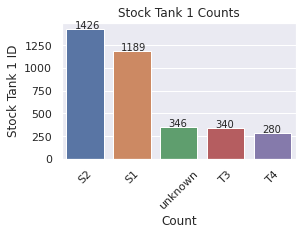

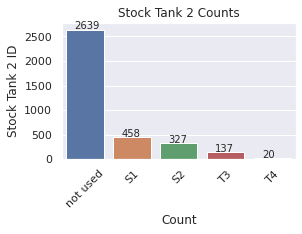

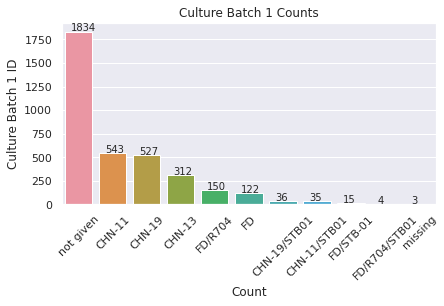

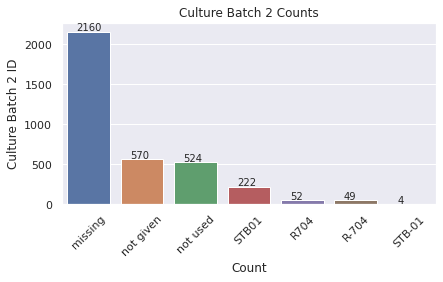

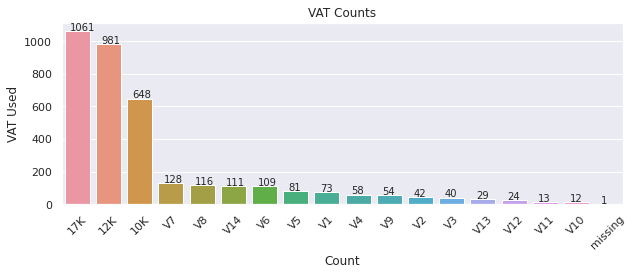

In [ ]:
# View the counts of the categorical variables:
plot_counts(
    df=df_cheese, col='stock_tank_1', ylabel='Stock Tank 1 ID',
    title='Stock Tank 1 Counts', orient='h', filename='stock_tank_1_counts'
)
plot_counts(
    df=df_cheese, col='stock_tank_2', ylabel='Stock Tank 2 ID',
    title='Stock Tank 2 Counts', orient='h', filename='stock_tank_2_counts'
)
plot_counts(
    df=df_cheese, col='culture_1_id', ylabel='Culture Batch 1 ID',
    title='Culture Batch 1 Counts', orient='h', figsize=(8,4), filename='culture_batch_1_counts'
)
plot_counts(
    df=df_cheese, col='culture_2_id', ylabel='Culture Batch 2 ID',
    title='Culture Batch 2 Counts', orient='h', figsize=(8,4), filename='culture_batch_2_counts'
)
plot_counts(
    df=df_cheese, col='vat_used', ylabel='VAT Used',
    title='VAT Counts', orient='h', figsize=(12,4), filename='vat_used_counts'
)

In [ ]:
# Format Bisham Foods Creamy for plotting purposes
df_cheese = df_cheese.replace('Bisham Foods Creamy', 'BFC')

In [ ]:
# Count number of missing values (i.e. NaN)
df_cheese.isna().sum().sort_values(ascending=False)

culture_2_bv          2679
culture_2_qty         2679
culture_2_id          2160
culture_1_id             3
vat_used                 1
process_time             0
hardening_ratio          0
floculation_time         0
rennet_temp              0
rennet_qty_bv            0
rennet_qty               0
culture_total_bv         0
culture_qty_total        0
culture_1_bv             0
culture_1_qty            0
run_id                   0
start_date               0
milk_protein_total       0
milk_fat_total           0
milk_protein_pc          0
milk_fat_pc              0
milk_volume              0
stock_tank_2             0
stock_tank_1             0
batch_no                 0
prod_code                0
cheese_type              0
run_name                 0
start_time               0
yield_by_weight          0
dtype: int64

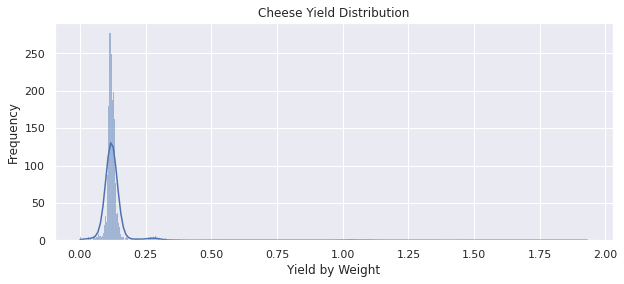

In [ ]:
# Look at distribution of output yield
plt.figure(figsize=(10, 4))
g = sns.histplot(data=df_cheese, x="yield_by_weight", kde=True)
g.set(title="Cheese Yield Distribution", xlabel='Yield by Weight', ylabel='Frequency')
plt.savefig('vis/yield_distribution_all.png', dpi=300)
plt.show()

In [ ]:
def is_outlier(s):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    mask = (s < (Q1 - 1.5 * IQR)) | (s > (Q3 + 1.5 * IQR))
    return mask

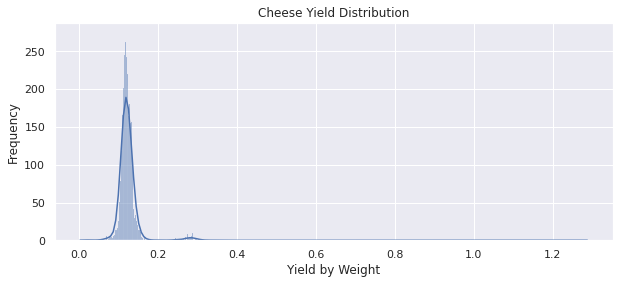

In [ ]:
# Visualise histogram without obvious outlier!
df_cheese_no_outliers = df_cheese[~df_cheese.groupby('prod_code')['yield_by_weight'].apply(is_outlier)]
plt.figure(figsize=(10, 4))
g = sns.histplot(data=df_cheese_no_outliers, x="yield_by_weight", kde=True)
g.set(title="Cheese Yield Distribution", xlabel='Yield by Weight', ylabel='Frequency')
plt.savefig('vis/yield_distribution_all.png', dpi=300)
plt.show()

In [ ]:
df_cheese[df_cheese['yield_by_weight'] > 1.28]

run_id start_date start_time  run_name cheese_type prod_code  batch_no  \
1058    1059    11/5/19    7:00:00    930941        soft        BB  20191105   
1063    1064    11/6/19    7:38:00    931041        soft        BM  20191106   
1084    1085   11/14/19    9:33:00    931841        soft        BB  20191121   

     vat_used stock_tank_1 stock_tank_2  ...  culture_2_bv  culture_qty_total  \
1058       V7      unknown     not used  ...           NaN              150.0   
1063       V1      unknown     not used  ...           NaN               62.5   
1084       V9      unknown     not used  ...           NaN              150.0   

      culture_total_bv  rennet_qty  rennet_qty_bv rennet_temp  \
1058            0.2500          45          0.075        34.3   
1063            0.1042          45          0.075        35.2   
1084            0.2500          45          0.075        35.4   

     floculation_time  hardening_ratio  process_time  yield_by_weight  
1058             18.0             5.00         21.93           1.2874  
1063             14.0             5.00         22.12           1.2872  
1084             16.0             1.25         21.22           1.9309  

[3 rows x 30 columns]

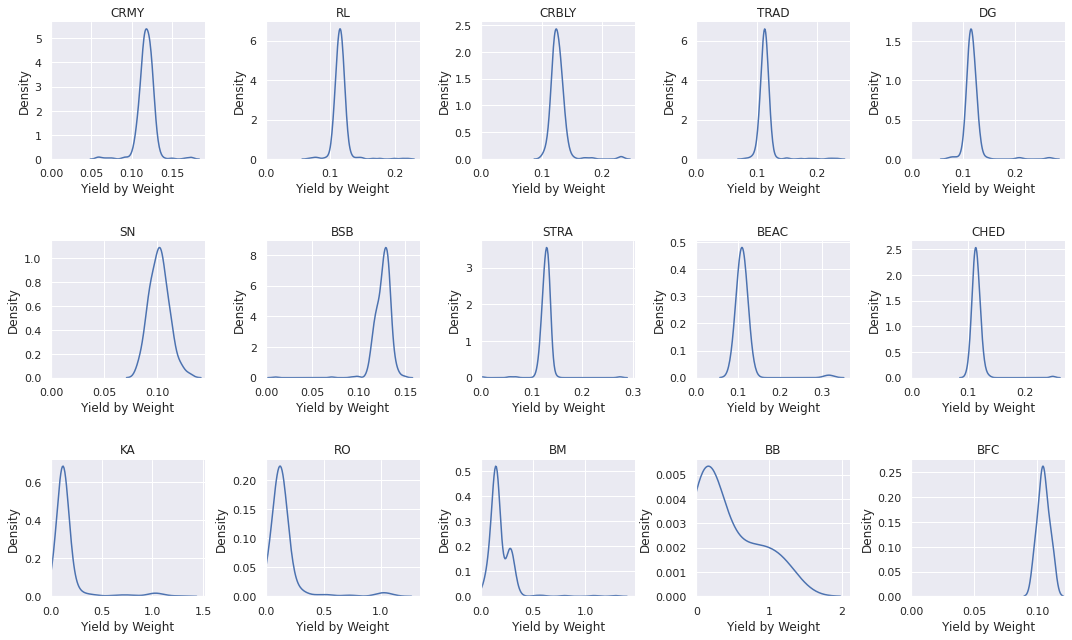

In [ ]:
# Look at distribution of output yield per cheese product
g = sns.displot(
    data=df_cheese[df_cheese['yield_by_weight'] < 1.9],
    x="yield_by_weight", col="prod_code", col_wrap=5,
    kind="kde", height=3, facet_kws=dict(sharex=False, sharey=False))

g.set_titles("{col_name}")
g.set(xlabel='Yield by Weight', ylabel='Density', xlim=(0, None))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.savefig('vis/yield_distribution_kde_all.png', dpi=300)
plt.show()

In [ ]:
# Remove any columns containing missing values
# df_cheese = df_cheese[df_cheese['vat_used'].notna()]

In [ ]:
# Remove rows where column values equal 'unknown' or 'not used'
# df_cheese = df_cheese[df_cheese['rennet_temp'] != 'unknown']
# df_cheese = df_cheese[df_cheese['stock_tank_1'] != 'unknown']
# df_cheese = df_cheese[df_cheese['stock_tank_2'] != 'not used']

In [ ]:
# Convert type
# df_cheese['rennet_temp'] = pd.to_numeric(df_cheese['rennet_temp'])

In [ ]:
# # Remove unwanted columns
# df_cheese_filtered = df_cheese.drop(columns=[
#     'run_id',
#     'start_date',
#     'start_time',
#     'run_name',
#     'batch_no',
# #     'culture_1_id',
# #     'culture_2_id',
# #     'culture_1_qty',
# #     'culture_1_bv',
# #     'culture_2_qty',
# #     'culture_2_bv',
# #     'culture_qty_total',
# #     'culture_total_bv',
# #     'stock_tank_1', # could be included, but has many missing values
# #     'stock_tank_2' # could be included, but has many missing values
# ])

In [ ]:
# # Remove outlier for 'Process Time'
# df_cheese_filtered = df_cheese_filtered[df_cheese_filtered['process_time'] < 200]

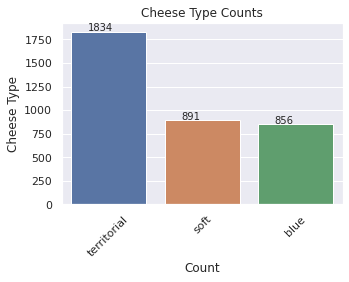

territorial    1834
soft            891
blue            856
Name: cheese_type, dtype: int64

In [ ]:
# View counts of different cheese products for all cheese types
plot_counts(
    df=df_cheese, col="cheese_type", ylabel='Cheese Type',
    title='Cheese Type Counts',
    filename='cheese_type_counts',
    figsize=(6,4),
    orient='h'
)
df_cheese['cheese_type'].value_counts()

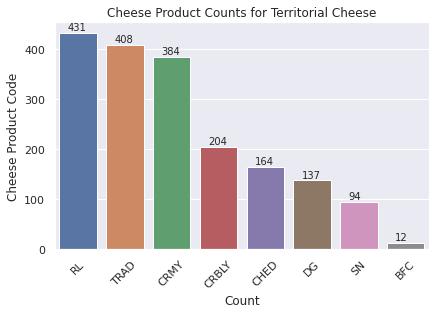

RL       431
TRAD     408
CRMY     384
CRBLY    204
CHED     164
DG       137
SN        94
BFC       12
Name: prod_code, dtype: int64

In [ ]:
# View counts of different cheese products for territorial cheese
df_territorial = df_cheese[df_cheese['cheese_type'] == 'territorial']
plot_counts(
    df=df_territorial, col="prod_code", ylabel='Cheese Product Code',
    title='Cheese Product Counts for Territorial Cheese',
    filename='cheese_product_code_counts_territorial',
    figsize=(8,5),
    orient='h'
)
df_territorial['prod_code'].value_counts()

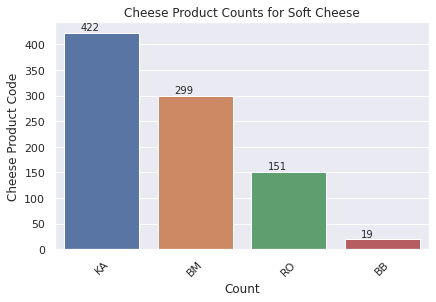

KA    422
BM    299
RO    151
BB     19
Name: prod_code, dtype: int64

In [ ]:
# View counts of different cheese products for soft cheese
df_soft = df_cheese[df_cheese['cheese_type'] == 'soft']
plot_counts(
    df=df_soft, col="prod_code", ylabel='Cheese Product Code',
    title='Cheese Product Counts for Soft Cheese',
    filename='cheese_product_code_counts_soft',
    figsize=(8,5),
    orient='h'
)
df_soft['prod_code'].value_counts()

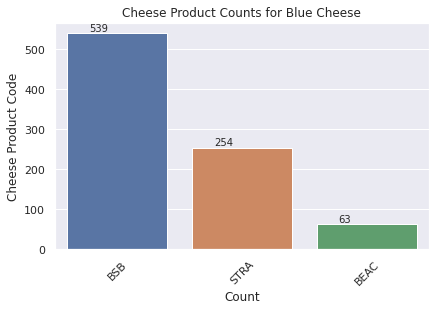

BSB     539
STRA    254
BEAC     63
Name: prod_code, dtype: int64

In [ ]:
# View counts of different cheese products for blue cheese
df_blue = df_cheese[df_cheese['cheese_type'] == 'blue']
plot_counts(
    df=df_blue, col="prod_code", ylabel='Cheese Product Code',
    title='Cheese Product Counts for Blue Cheese',
    filename='cheese_product_code_counts_blue',
    figsize=(8,5),
    orient='h'
)
df_blue['prod_code'].value_counts()

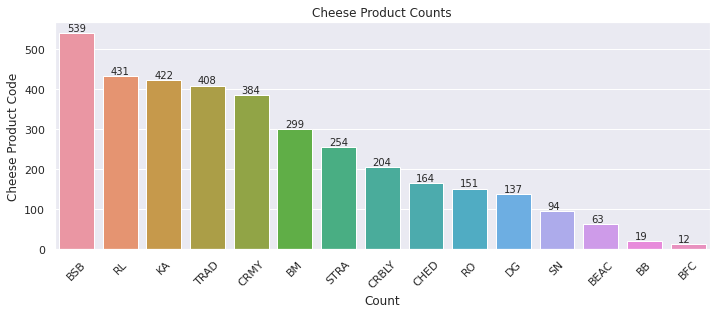

BSB      539
RL       431
KA       422
TRAD     408
CRMY     384
BM       299
STRA     254
CRBLY    204
CHED     164
RO       151
DG       137
SN        94
BEAC      63
BB        19
BFC       12
Name: prod_code, dtype: int64

In [ ]:
# View counts of different cheese products for all cheese types
plot_counts(
    df=df_cheese, col="prod_code", ylabel='Cheese Product Code',
    title='Cheese Product Counts',
    filename='cheese_product_code_counts_all',
    figsize=(14,5),
    orient='h'
)
df_cheese['prod_code'].value_counts()

In [ ]:
df_cheese.describe().T

count          mean            std           min  \
run_id              3581.0  1.791000e+03    1033.889984  1.000000e+00   
run_name            3581.0  3.879924e+05  634008.055831  2.010000e+02   
batch_no            3581.0  2.020076e+07   10077.874056  2.018072e+07   
milk_volume         3581.0  1.040065e+04    4865.470118  2.500000e+02   
milk_fat_pc         3581.0  4.210447e+00       0.354157  1.430000e+00   
milk_protein_pc     3581.0  3.341759e+00       0.322169  1.170000e+00   
milk_fat_total      3581.0  4.469755e+02     216.941792  8.600000e+00   
milk_protein_total  3581.0  3.578571e+02     175.830928  6.600000e+00   
culture_1_qty       3581.0  8.075414e+02     854.814339  2.500000e+01   
culture_1_bv        3581.0  7.609176e-02       0.067407  2.100000e-03   
culture_2_qty        902.0  2.715355e+02     260.480322  2.500000e+01   
culture_2_bv         902.0  2.443027e-02       0.019599  1.700000e-03   
culture_qty_total   3581.0  8.759371e+02     848.477695  4.025000e+01   
culture_total_bv    3581.0  8.224873e-02       0.065406  4.100000e-03   
rennet_qty          3581.0  6.539288e+02     463.900141  2.000000e+01   
rennet_qty_bv       3581.0  5.694289e-02       0.024491  3.300000e-03   
floculation_time    3581.0  1.730698e+01       5.708112  5.000000e+00   
hardening_ratio     3581.0  3.370204e+00       0.975525  4.000000e-01   
process_time        3581.0  1.642095e+01      17.388199  1.500000e-01   
yield_by_weight     3581.0  1.330085e-01       0.095772  6.000000e-04   

                             25%           50%           75%           max  
run_id              8.960000e+02  1.791000e+03  2.686000e+03  3.581000e+03  
run_name            2.621200e+04  1.222120e+05  9.071110e+05  9.238101e+06  
batch_no            2.019091e+07  2.020062e+07  2.021050e+07  2.022032e+07  
milk_volume         7.800000e+03  1.141300e+04  1.213100e+04  1.758700e+04  
milk_fat_pc         4.150000e+00  4.310000e+00  4.410000e+00  6.860000e+00  
milk_protein_pc     3.340000e+00  3.460000e+00  3.540000e+00  4.400000e+00  
milk_fat_total      3.230000e+02  4.785000e+02  5.484000e+02  8.347000e+02  
milk_protein_total  2.663000e+02  3.894000e+02  4.380000e+02  6.596000e+02  
culture_1_qty       2.000000e+02  5.000000e+02  1.500000e+03  5.000000e+03  
culture_1_bv        3.080000e-02  5.000000e-02  1.176000e-01  5.000000e-01  
culture_2_qty       5.000000e+01  2.500000e+02  3.750000e+02  2.520000e+03  
culture_2_bv        9.450000e-03  2.080000e-02  2.940000e-02  2.734000e-01  
culture_qty_total   2.000000e+02  5.000000e+02  1.500000e+03  5.000000e+03  
culture_total_bv    4.170000e-02  5.210000e-02  1.176000e-01  5.000000e-01  
rennet_qty          2.600000e+02  6.500000e+02  7.200000e+02  3.672000e+03  
rennet_qty_bv       5.950000e-02  6.000000e-02  7.500000e-02  2.220000e-01  
floculation_time    1.400000e+01  1.550000e+01  2.300000e+01  3.400000e+01  
hardening_ratio     2.570000e+00  3.460000e+00  4.000000e+00  1.400000e+01  
process_time        4.000000e+00  2.092000e+01  2.483000e+01  7.765000e+02  
yield_by_weight     1.124000e-01  1.197000e-01  1.292000e-01  1.930900e+00

In [ ]:
df_cheese.corr()

run_id  run_name  batch_no  milk_volume  milk_fat_pc  \
run_id              1.000000 -0.536149  0.962694     0.037592     0.094579   
run_name           -0.536149  1.000000 -0.552086    -0.018267    -0.121433   
batch_no            0.962694 -0.552086  1.000000     0.034612     0.111039   
milk_volume         0.037592 -0.018267  0.034612     1.000000     0.526015   
milk_fat_pc         0.094579 -0.121433  0.111039     0.526015     1.000000   
milk_protein_pc     0.064784 -0.105437  0.072625     0.656774     0.843605   
milk_fat_total      0.038060 -0.026878  0.035689     0.992937     0.601289   
milk_protein_total  0.031713 -0.025274  0.028291     0.993932     0.575343   
culture_1_qty      -0.041324  0.026216 -0.062754     0.618529     0.253622   
culture_1_bv       -0.179513  0.134932 -0.205577     0.048901    -0.122717   
culture_2_qty      -0.475028  0.215823 -0.437002     0.570410     0.065269   
culture_2_bv       -0.415949  0.147961 -0.376395     0.350610     0.039963   
culture_qty_total  -0.055332  0.029300 -0.071114     0.648964     0.286502   
culture_total_bv   -0.189245  0.135029 -0.209885     0.064172    -0.092080   
rennet_qty         -0.082418  0.070579 -0.090106     0.900376     0.399055   
rennet_qty_bv      -0.262755  0.227792 -0.270395     0.517914     0.125849   
floculation_time   -0.072143  0.013804 -0.029936     0.379792     0.448099   
hardening_ratio     0.016426  0.008400 -0.024288    -0.223557    -0.257009   
process_time        0.095587 -0.067773  0.072479     0.224017     0.105842   
yield_by_weight    -0.025514  0.045571 -0.043812    -0.217123    -0.025457   

                    milk_protein_pc  milk_fat_total  milk_protein_total  \
run_id                     0.064784        0.038060            0.031713   
run_name                  -0.105437       -0.026878           -0.025274   
batch_no                   0.072625        0.035689            0.028291   
milk_volume                0.656774        0.992937            0.993932   
milk_fat_pc                0.843605        0.601289            0.575343   
milk_protein_pc            1.000000        0.699426            0.712747   
milk_fat_total             0.699426        1.000000            0.996816   
milk_protein_total         0.712747        0.996816            1.000000   
culture_1_qty              0.331319        0.613426            0.615047   
culture_1_bv              -0.095236        0.051506            0.056093   
culture_2_qty              0.168172        0.551448            0.555693   
culture_2_bv               0.111976        0.338231            0.342690   
culture_qty_total          0.370004        0.645015            0.646933   
culture_total_bv          -0.060046        0.068721            0.073645   
rennet_qty                 0.514111        0.893790            0.895570   
rennet_qty_bv              0.233911        0.515323            0.521219   
floculation_time           0.637757        0.385560            0.403336   
hardening_ratio           -0.345975       -0.220597           -0.226611   
process_time               0.069104        0.226248            0.221537   
yield_by_weight           -0.048073       -0.205681           -0.203359   

                    culture_1_qty  culture_1_bv  culture_2_qty  culture_2_bv  \
run_id                  -0.041324     -0.179513      -0.475028     -0.415949   
run_name                 0.026216      0.134932       0.215823      0.147961   
batch_no                -0.062754     -0.205577      -0.437002     -0.376395   
milk_volume              0.618529      0.048901       0.570410      0.350610   
milk_fat_pc              0.253622     -0.122717       0.065269      0.039963   
milk_protein_pc          0.331319     -0.095236       0.168172      0.111976   
milk_fat_total           0.613426      0.051506       0.551448      0.338231   
milk_protein_total       0.615047      0.056093       0.555693      0.342690   
culture_1_qty            1.000000      0.746987       0.800738      0.675885   
culture

In [ ]:
# Visualise correlations between the variables using visualisation
def corr_mat_vis(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)

    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    title = 'CORRELATION MATRIX\nPRODUCTION RUN VARIABLE CORRELATIONS\n'
    plt.title(title, loc='left', fontsize=18)
    plt.subplots_adjust(bottom=0.25, left=0.25)
    plt.savefig('vis/corr_mat.png', dpi=300)
    plt.show()

In [ ]:
cols_to_ignore = ['run_id', 'run_name', 'batch_no']

In [ ]:
df_cheese_imp = df_cheese.drop(cols_to_ignore, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


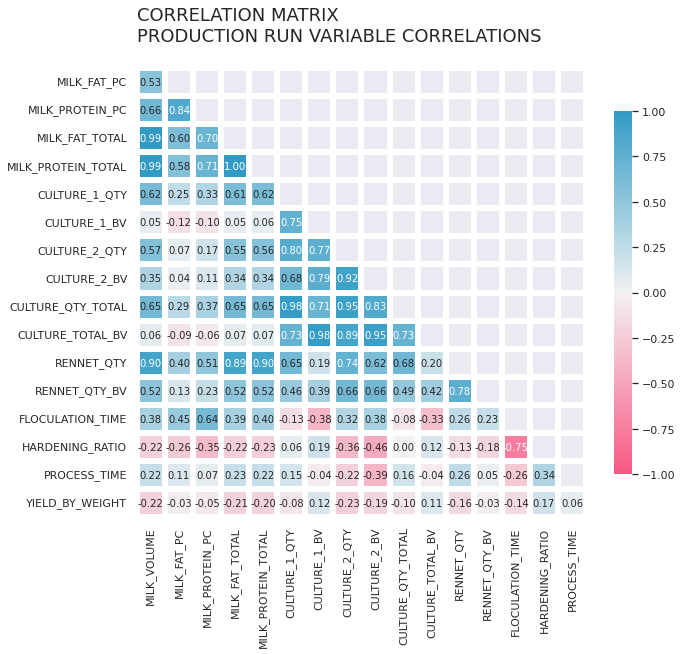

In [ ]:
corr_mat_vis(df_cheese_imp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


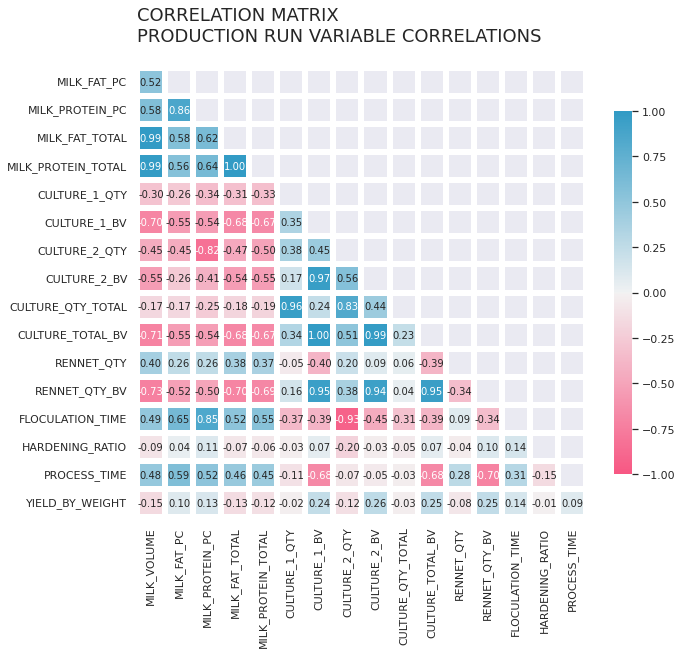

In [ ]:
corr_mat_vis(df_cheese_imp[df_cheese_imp['cheese_type'] == 'soft'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


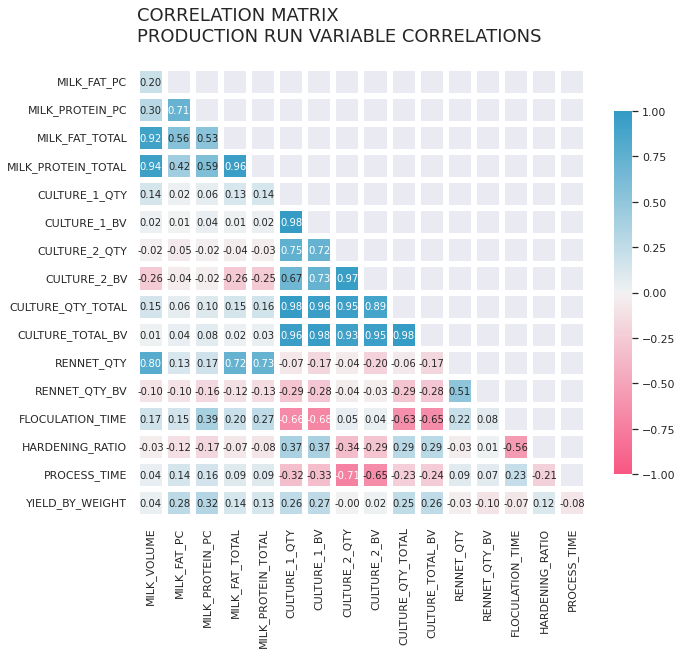

In [ ]:
corr_mat_vis(df_cheese_imp[df_cheese_imp['cheese_type'] == 'territorial'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


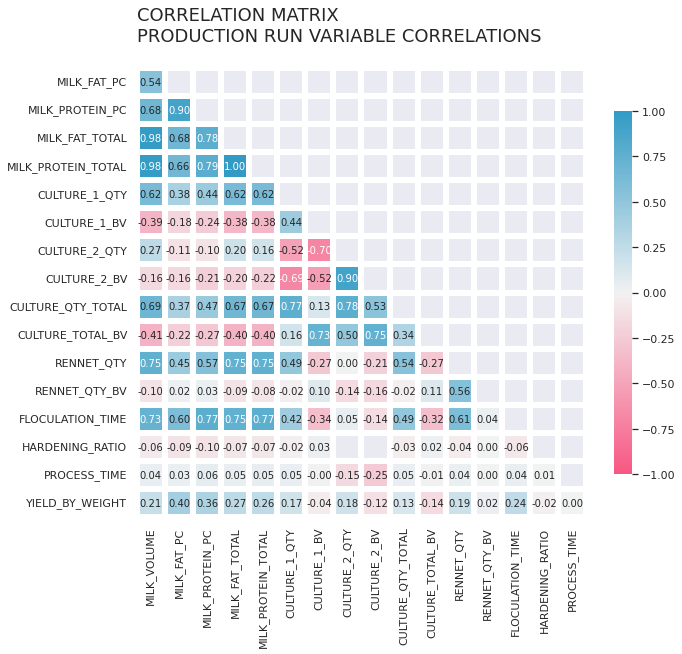

In [ ]:
corr_mat_vis(df_cheese_imp[df_cheese_imp['cheese_type'] == 'blue'])

In [ ]:
df_cheese.corr()['yield_by_weight'].sort_values(ascending=False)

yield_by_weight       1.000000
hardening_ratio       0.172323
culture_1_bv          0.120847
culture_total_bv      0.114323
process_time          0.061560
run_name              0.045571
milk_fat_pc          -0.025457
run_id               -0.025514
rennet_qty_bv        -0.028012
batch_no             -0.043812
milk_protein_pc      -0.048073
culture_1_qty        -0.082252
culture_qty_total    -0.095669
floculation_time     -0.143186
rennet_qty           -0.163643
culture_2_bv         -0.185992
milk_protein_total   -0.203359
milk_fat_total       -0.205681
milk_volume          -0.217123
culture_2_qty        -0.226968
Name: yield_by_weight, dtype: float64

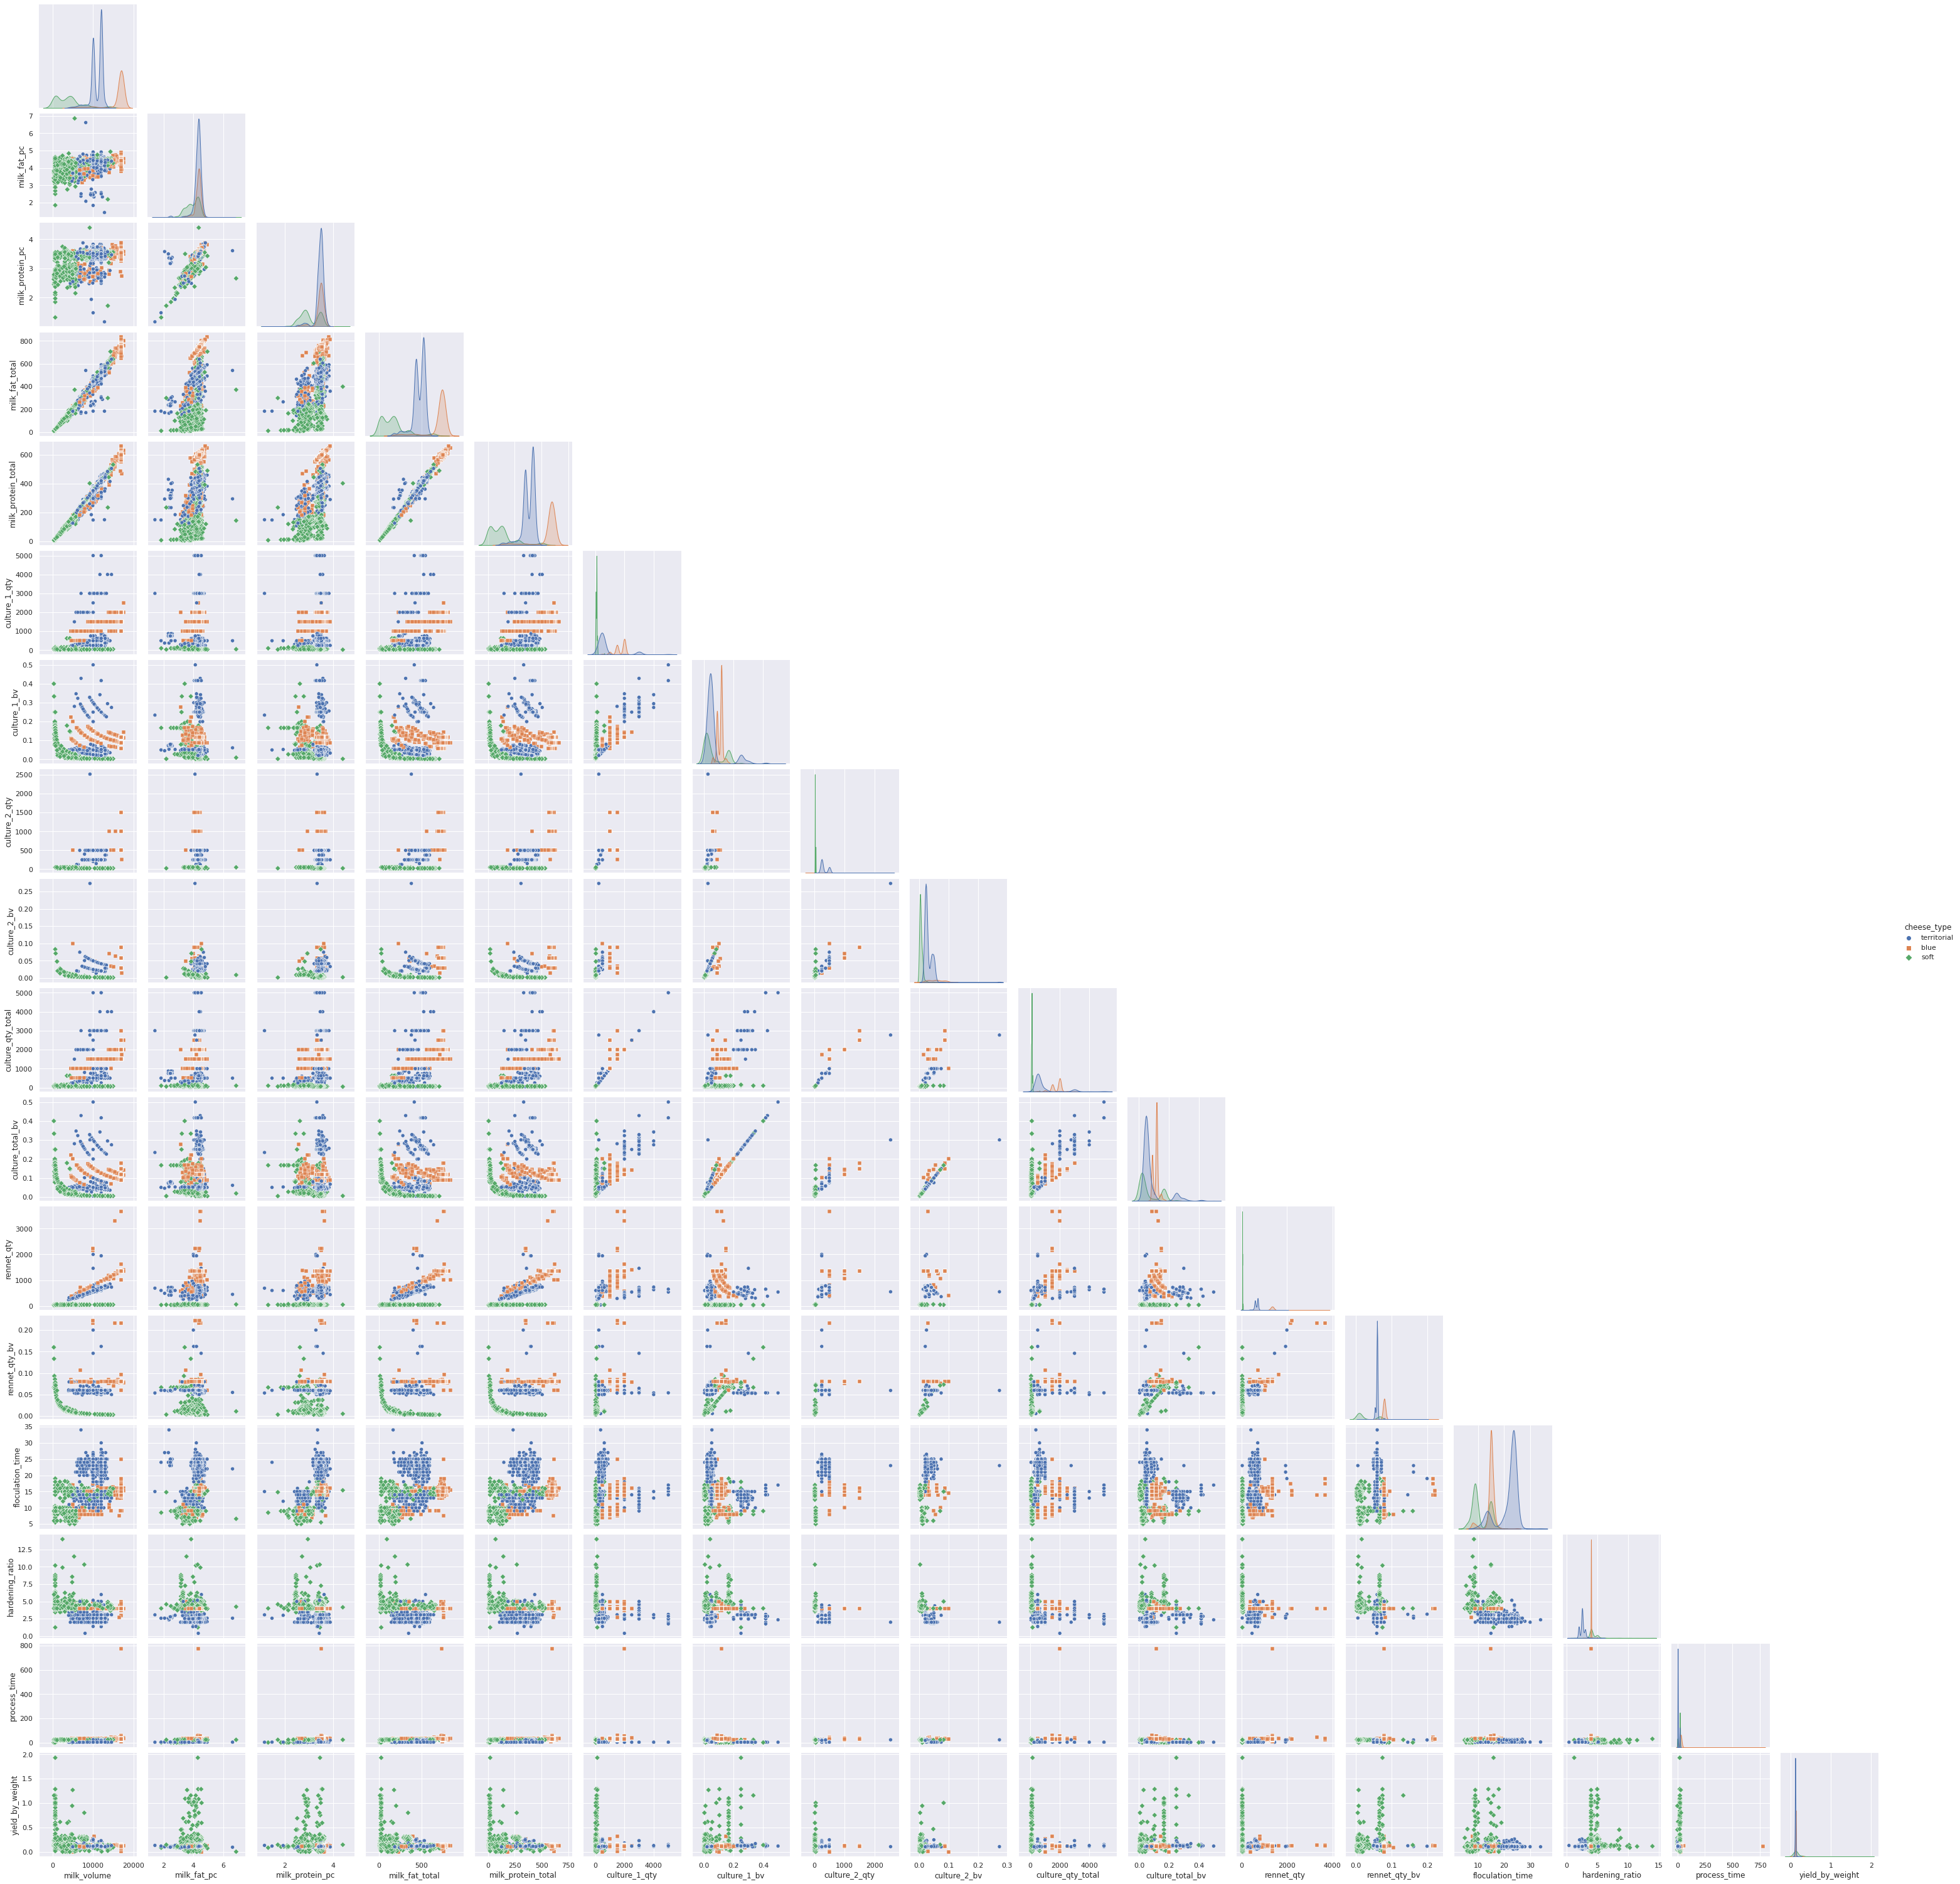

In [ ]:
# Takes a minute or two!
sns.pairplot(
    df_cheese.drop(cols_to_ignore, axis=1), hue="cheese_type", diag_kind='kde', markers=["o", "s", "D"], corner=True)
plt.savefig('vis/variable_plots.jpg', dpi=300)
plt.show()

In [ ]:
def facet_scatter(df, x, y, col, xlabel, ylabel, title):
    g = sns.FacetGrid(df, col=col, height=3, col_wrap=5, sharex=True, sharey=True)
    g.map(plt.scatter, x, y, s=2)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(xlim=(0, None), ylim=(0, None), xlabel=xlabel, ylabel=ylabel)
    plt.savefig(f'vis/{title}.png', dpi=300)
    plt.show()

In [ ]:
cols = [
    'milk_volume', 'milk_fat_pc', 'milk_protein_pc', 'milk_fat_total',
    'milk_protein_total', 'culture_1_qty', 'culture_1_bv', 'culture_2_qty',
    'culture_2_bv', 'culture_qty_total', 'culture_total_bv', 'rennet_qty',
    'rennet_qty_bv', 'floculation_time', 'hardening_ratio', 'process_time'
]

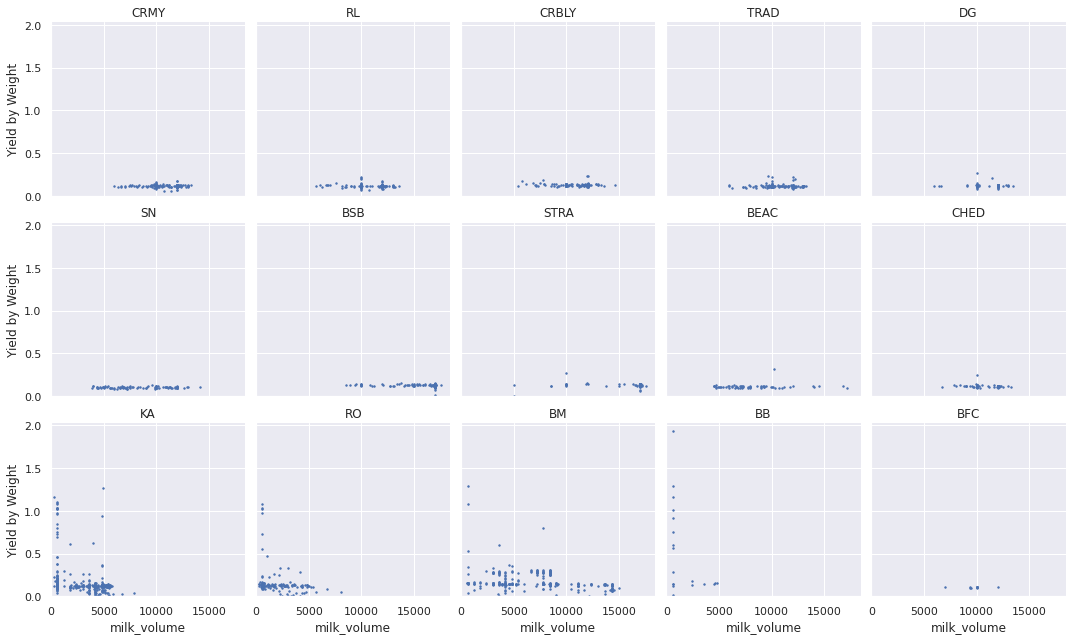

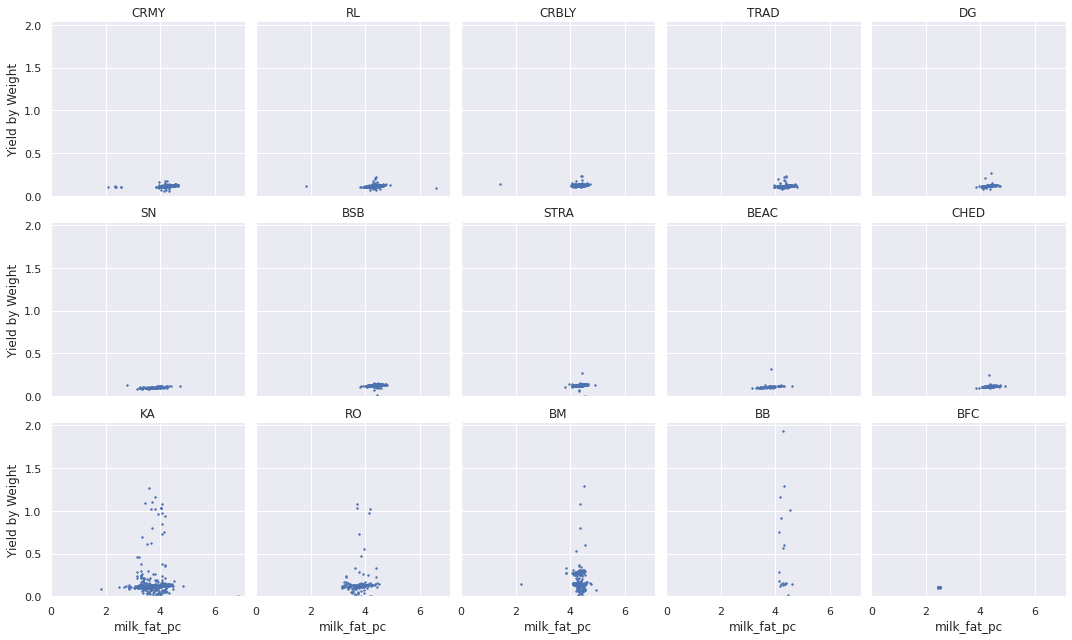

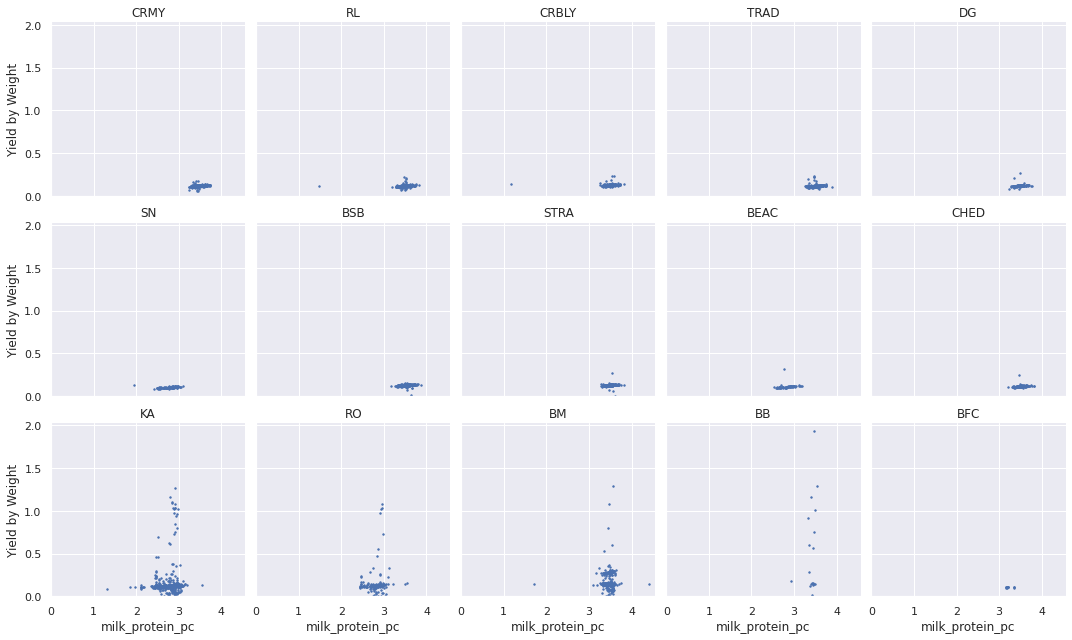

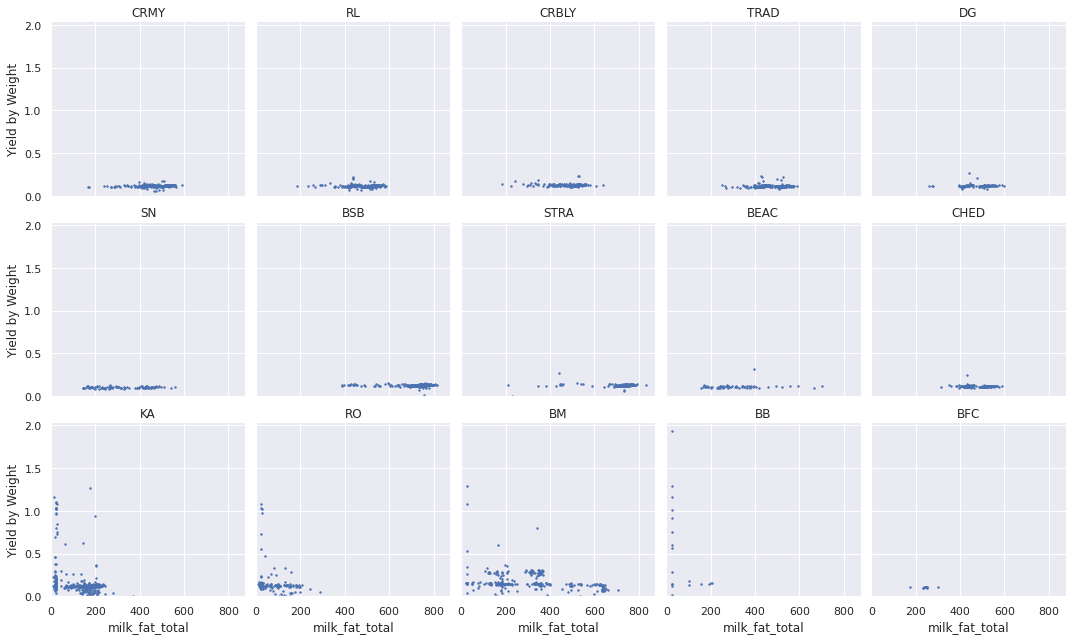

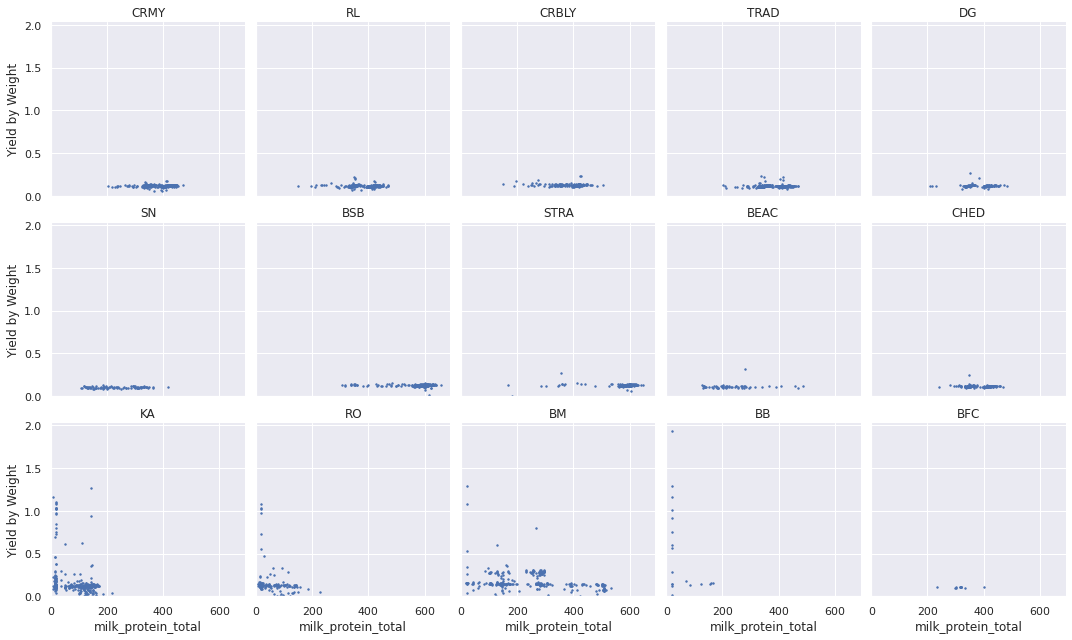

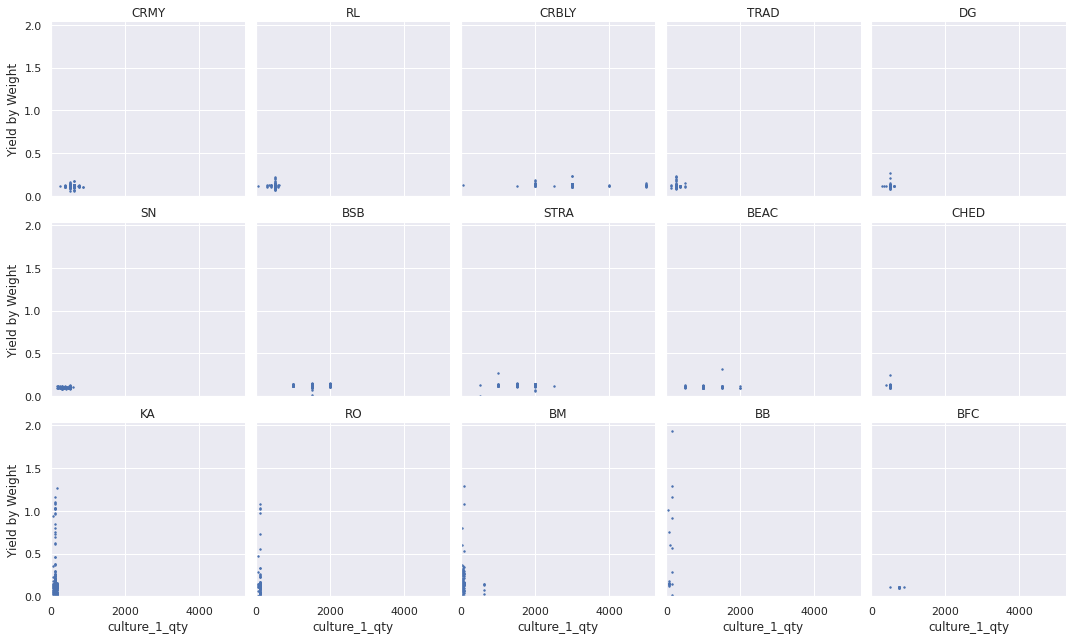

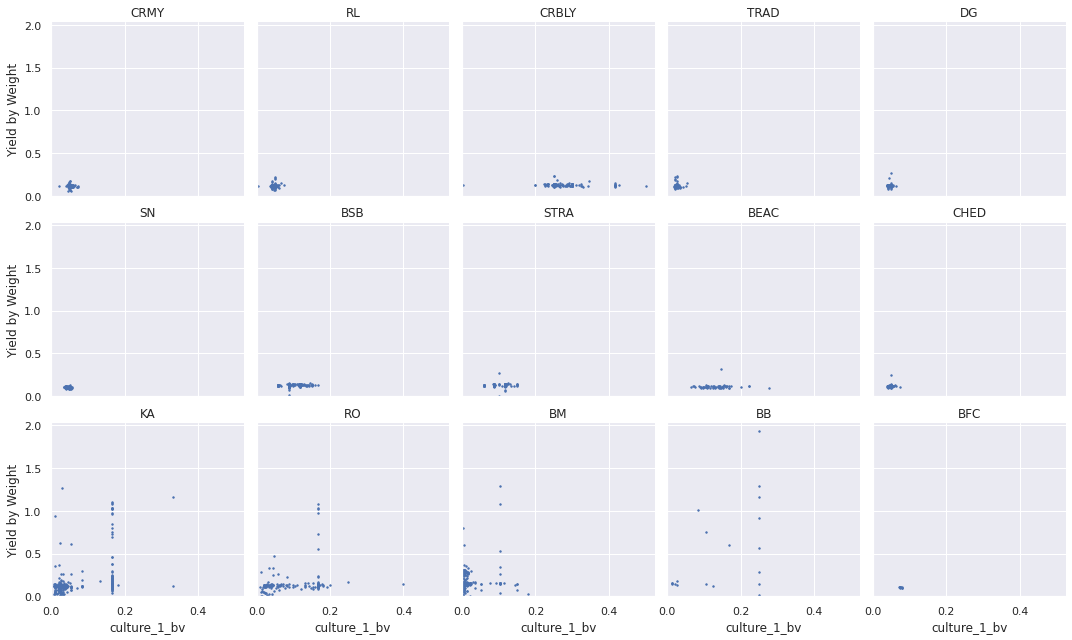

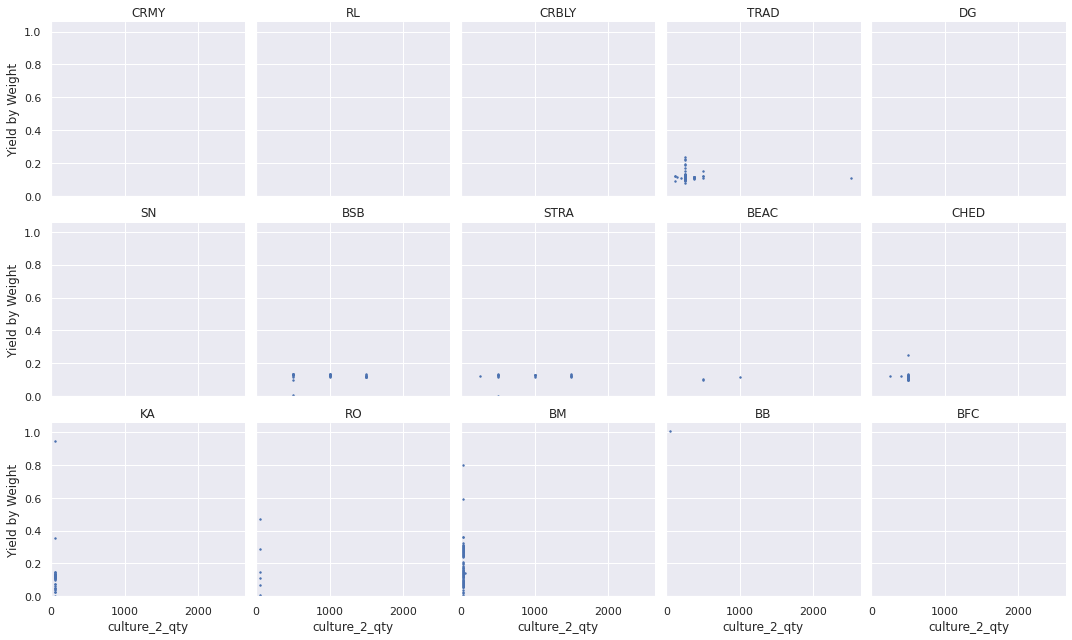

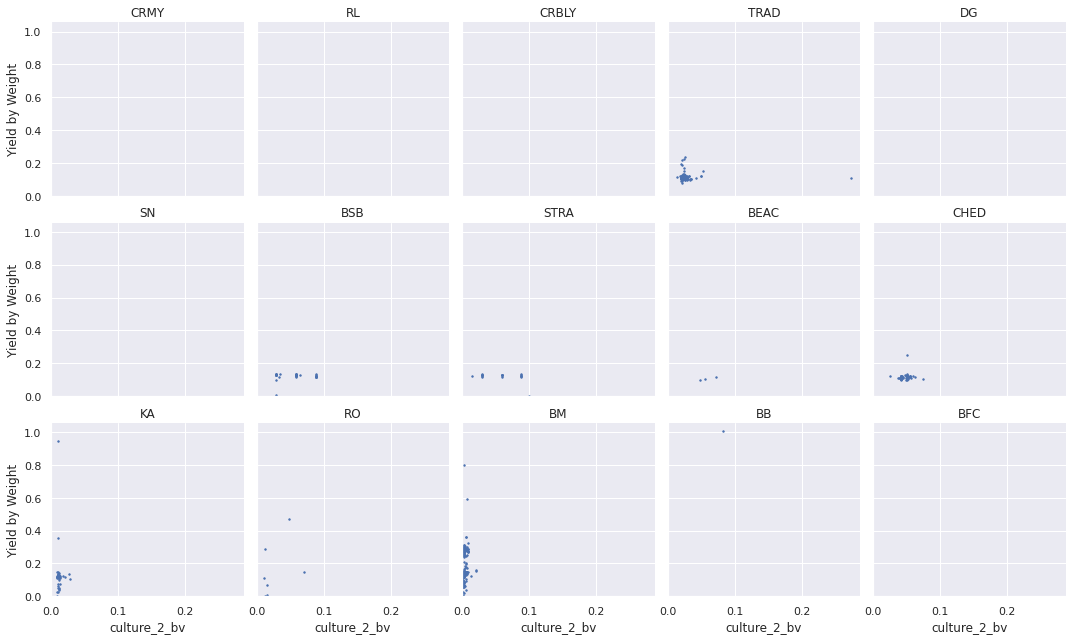

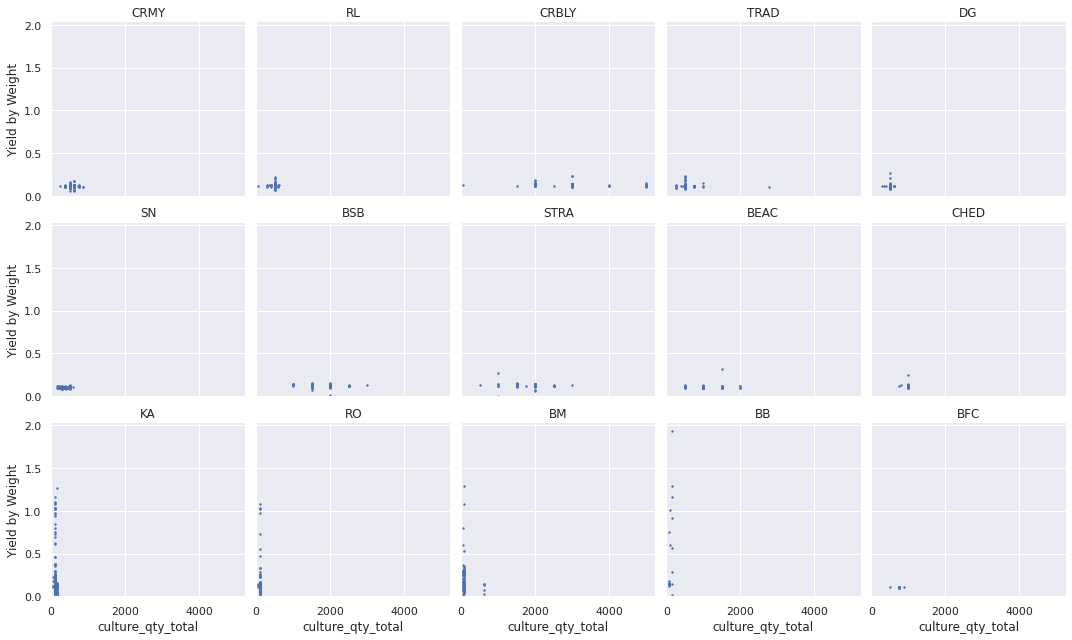

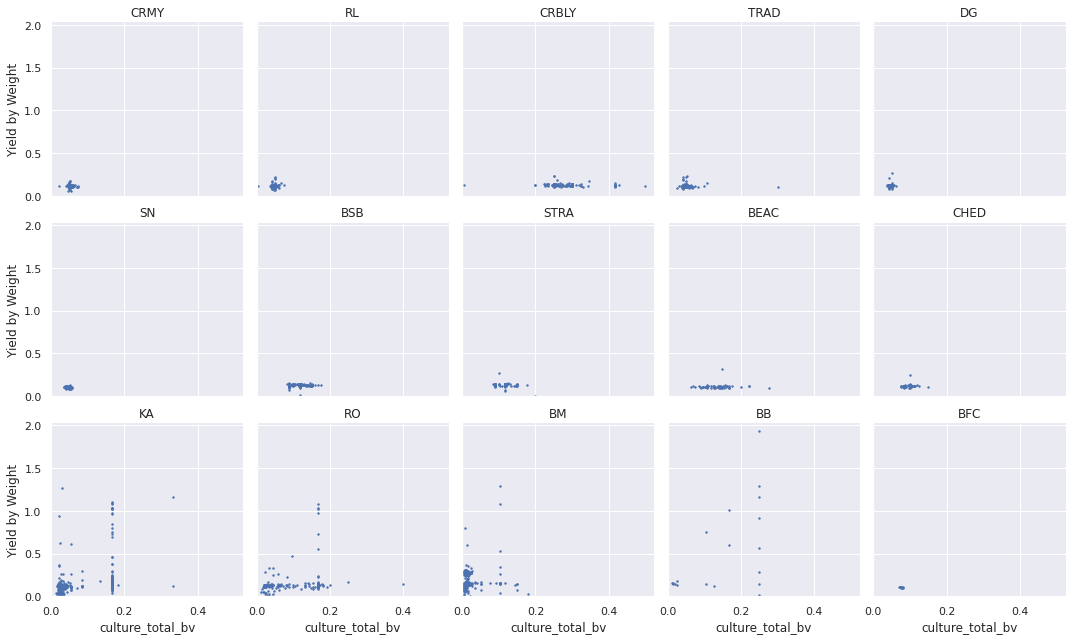

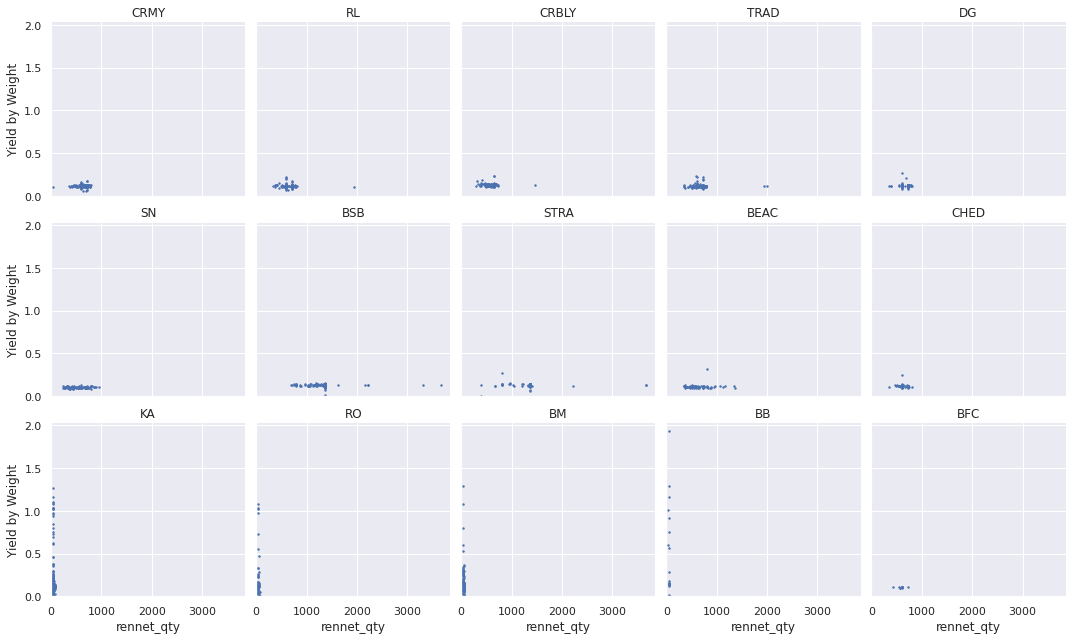

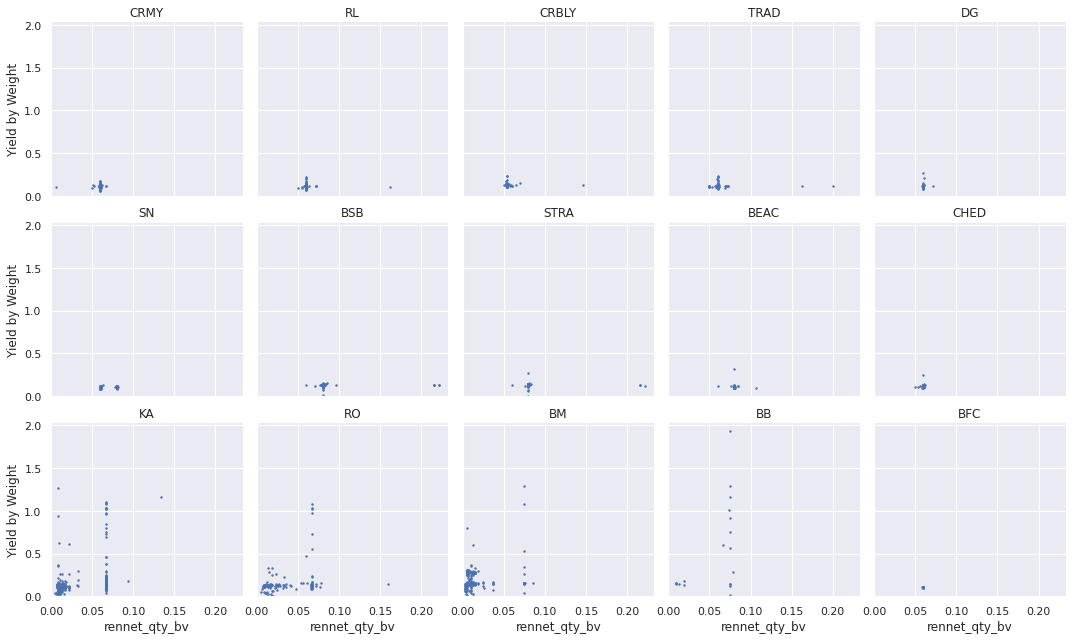

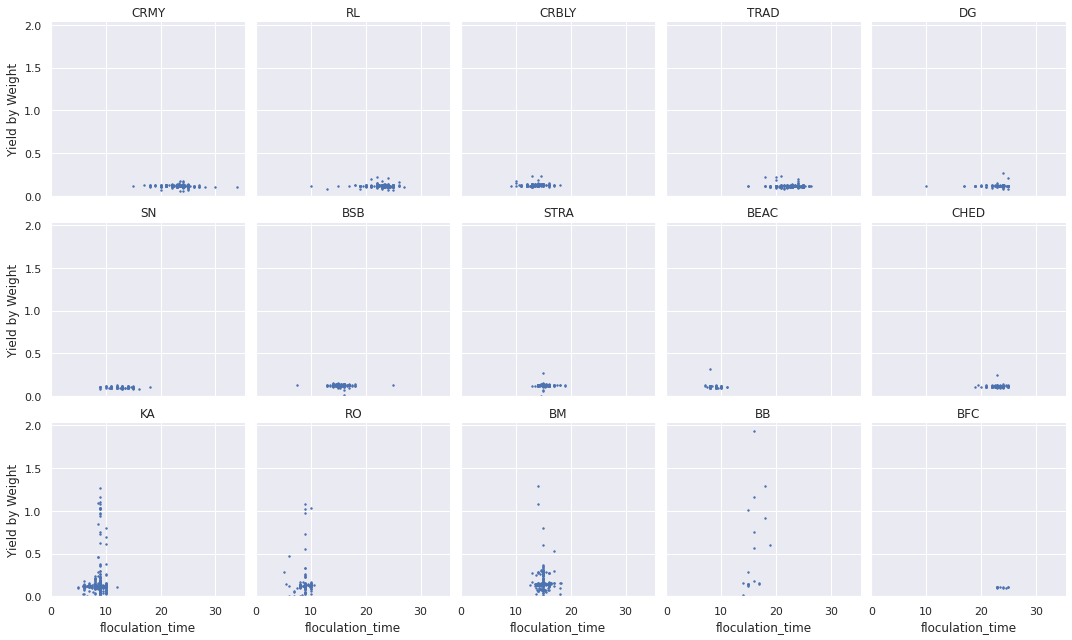

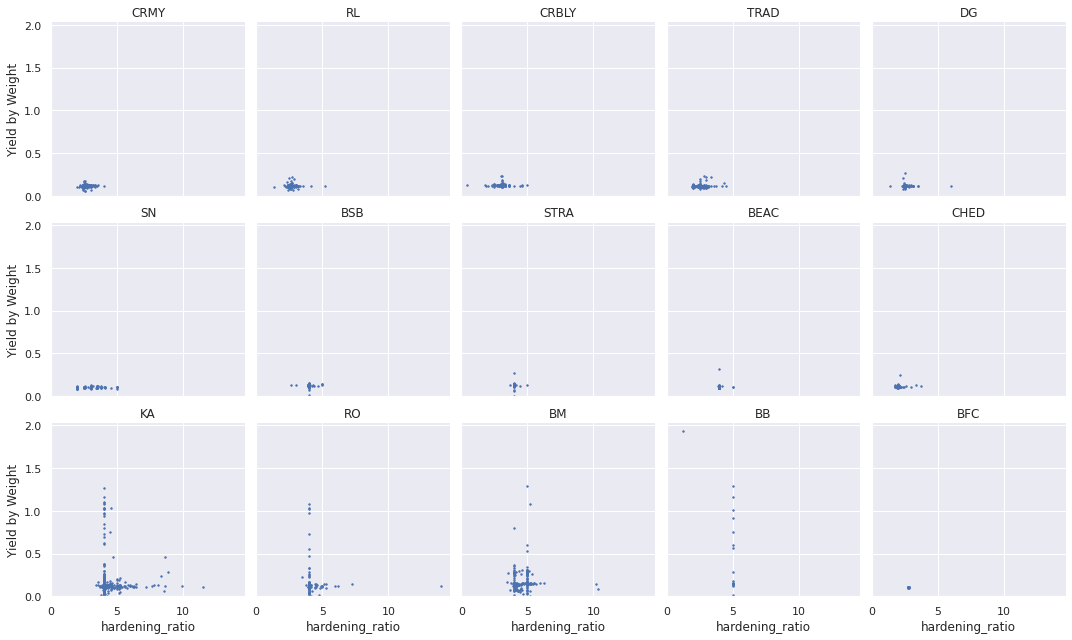

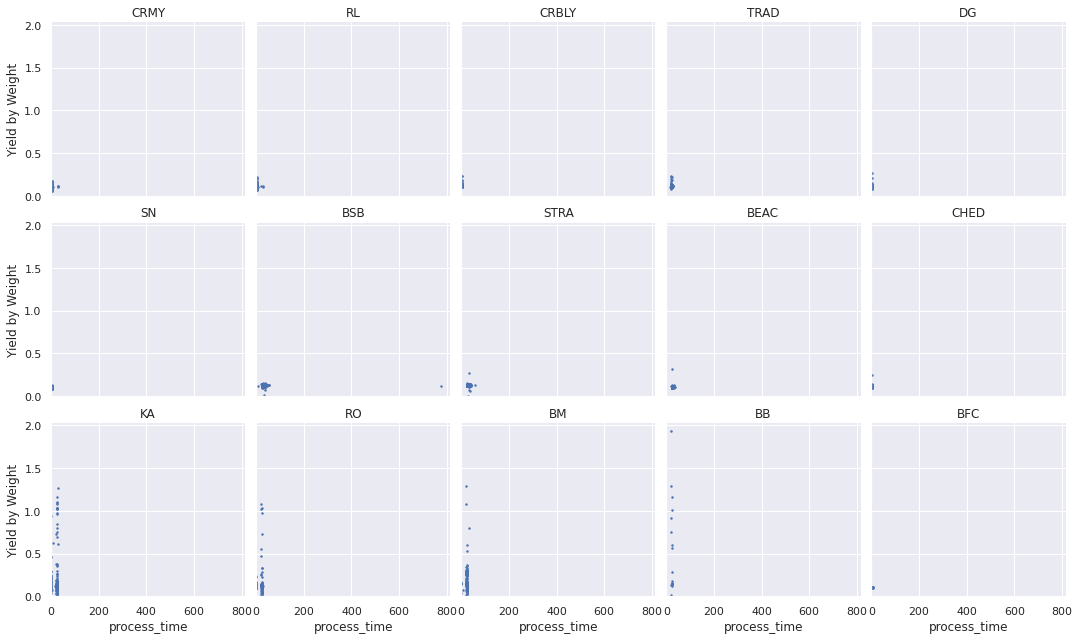

In [ ]:
for col in cols:
    facet_scatter(
        df_cheese, x=col, y="yield_by_weight", col="prod_code",
        xlabel=col, ylabel='Yield by Weight',
        title=f'yield_against_{col}_per_cheese_product')

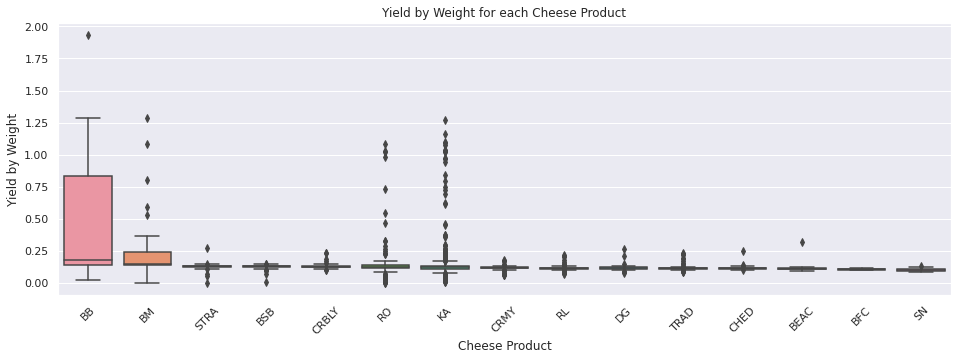

In [ ]:
# Lets look at the boxplots for yields for each cheese product:
fig, ax = plt.subplots(figsize=(16, 6))
my_order = df_cheese.groupby(by=["prod_code"])["yield_by_weight"].median().sort_values().iloc[::-1].index
ax = sns.boxplot(x="prod_code", y="yield_by_weight", data=df_cheese, order=my_order)
ax.set(title='Yield by Weight for each Cheese Product', xlabel='Cheese Product', ylabel='Yield by Weight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.subplots_adjust(bottom=0.25)
plt.savefig('vis/cheese_product_yield_box.png', dpi=300)
plt.show()

Drilling into more detail, we see mose cheese products have a yield ranging from above 0 to around 0.3, however a few cheese products can obtain larger yields (KA, RO, BM, BB).

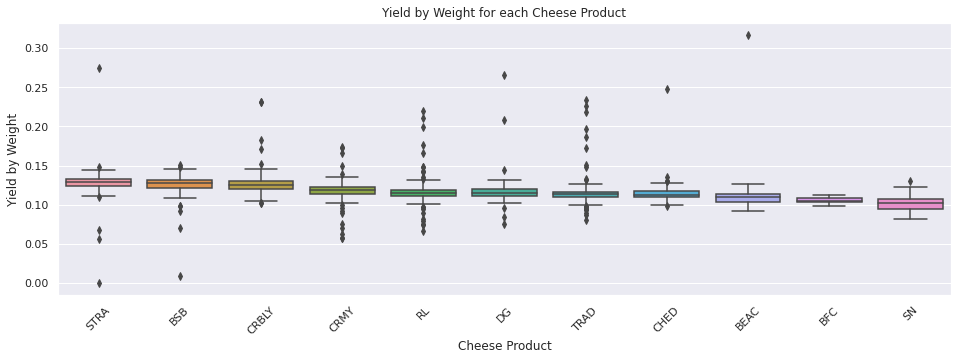

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
to_exclude = ['BB','BM','RO','KA']
my_order = df_cheese.loc[
    ~df_cheese['prod_code'].isin(to_exclude)
].groupby(by=["prod_code"])["yield_by_weight"].median().sort_values().iloc[::-1].index
ax = sns.boxplot(x="prod_code", y="yield_by_weight", data=df_cheese.loc[~df_cheese['prod_code'].isin(to_exclude)], order=my_order)
ax.set(title='Yield by Weight for each Cheese Product', xlabel='Cheese Product', ylabel='Yield by Weight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.subplots_adjust(bottom=0.25)
plt.savefig('vis/cheese_product_yield_box_trimmed.png', dpi=300)
plt.show()

Lets look at the median value of each variable for each yield outlier for each cheese product:

In [ ]:
df_cheese.groupby('prod_code')['yield_by_weight'].describe()

count      mean       std     min       25%      50%       75%  \
prod_code                                                                   
BB          19.0  0.516279  0.527547  0.0185  0.142800  0.17810  0.832050   
BEAC        63.0  0.111967  0.027331  0.0918  0.103950  0.10940  0.113800   
BFC         12.0  0.105250  0.004537  0.0980  0.103500  0.10450  0.108125   
BM         299.0  0.180648  0.120469  0.0020  0.136050  0.14630  0.244150   
BSB        539.0  0.126171  0.009139  0.0095  0.121350  0.12730  0.131700   
CHED       164.0  0.114618  0.012126  0.0980  0.110000  0.11290  0.117325   
CRBLY      204.0  0.126851  0.014060  0.1019  0.119950  0.12490  0.130500   
CRMY       384.0  0.118111  0.010522  0.0582  0.113750  0.11845  0.123050   
DG         137.0  0.117139  0.016991  0.0750  0.111500  0.11490  0.120600   
KA         422.0  0.161421  0.185147  0.0048  0.108200  0.12025  0.131725   
RL         431.0  0.115591  0.011949  0.0665  0.110650  0.11500  0.119100   
RO         151.0  0.155385  0.166025  0.0011  0.112000  0.12420  0.136400   
SN          94.0  0.101879  0.009240  0.0823  0.095075  0.10200  0.106875   
STRA       254.0  0.127720  0.014842  0.0006  0.123975  0.12870  0.132675   
TRAD       408.0  0.114361  0.013269  0.0805  0.109675  0.11330  0.116725   

              max  
prod_code          
BB         1.9309  
BEAC       0.3163  
BFC        0.1126  
BM         1.2872  
BSB        0.1504  
CHED       0.2484  
CRBLY      0.2316  
CRMY       0.1744  
DG         0.2655  
KA         1.2703  
RL         0.2198  
RO         1.0848  
SN         0.1302  
STRA       0.2742  
TRAD       0.2339

Let's investigate the culture batches in more detail.

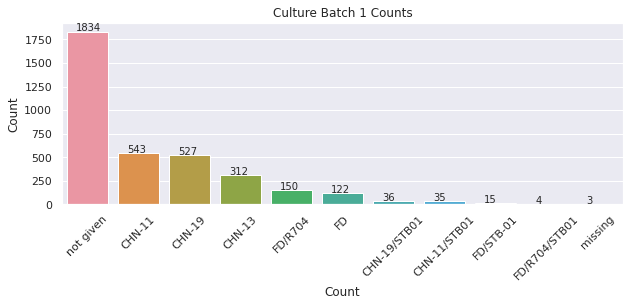

In [ ]:
plot_counts(
    df=df_cheese, col="culture_1_id", ylabel='Count',
    title='Culture Batch 1 Counts',
    filename='culture_1_id_counts',
    figsize=(12,4),
    orient='h'
)

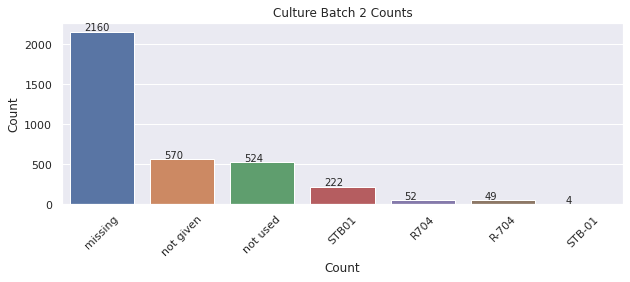

In [ ]:
plot_counts(
    df=df_cheese, col="culture_2_id", ylabel='Count',
    title='Culture Batch 2 Counts',
    filename='culture_2_id_counts',
    figsize=(12,4),
    orient='h'
)

In [ ]:
df_cheese[df_cheese['culture_2_id'].isna()][['culture_2_id', 'culture_2_qty']]

culture_2_id  culture_2_qty
0             NaN            NaN
1             NaN            NaN
2             NaN            NaN
3             NaN            NaN
4             NaN            NaN
...           ...            ...
3572          NaN            NaN
3576          NaN            NaN
3578          NaN            NaN
3579          NaN            NaN
3580          NaN            NaN

[2160 rows x 2 columns]

Let's visualise the yield distribution for relevant cheese products and the culture batches used to obtain that yield:

In [ ]:
df_cheese[df_cheese['cheese_type'] == 'territorial']['prod_code'].unique()

array(['CRMY', 'RL', 'CRBLY', 'TRAD', 'DG', 'SN', 'CHED', 'BFC'],
      dtype=object)

In [ ]:
df_cheese_not_territorial = df_cheese[df_cheese['cheese_type'] != 'territorial']

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


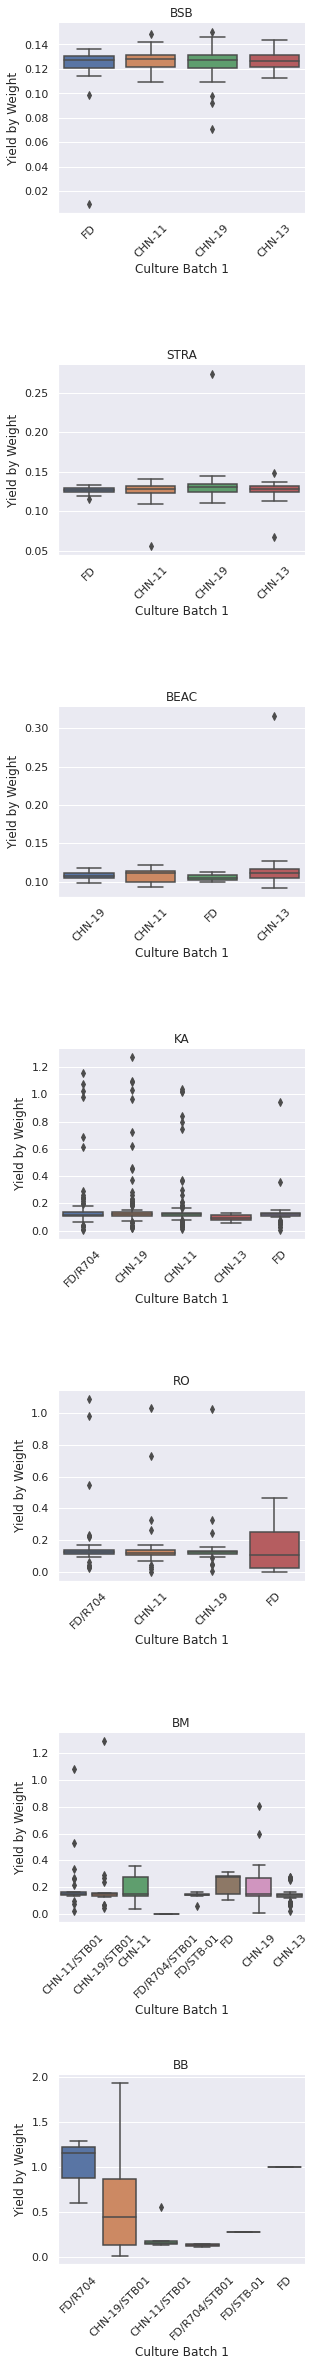

In [ ]:
g = sns.catplot(
    x="culture_1_id", y="yield_by_weight", row="prod_code",
    height=1.5, aspect=3, data=df_cheese_not_territorial, kind="box",
    sharey=False, sharex=False)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
g.set_titles("{row_name}")
g.set(xlabel='Culture Batch 1', ylabel='Yield by Weight')
plt.subplots_adjust(bottom=-2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


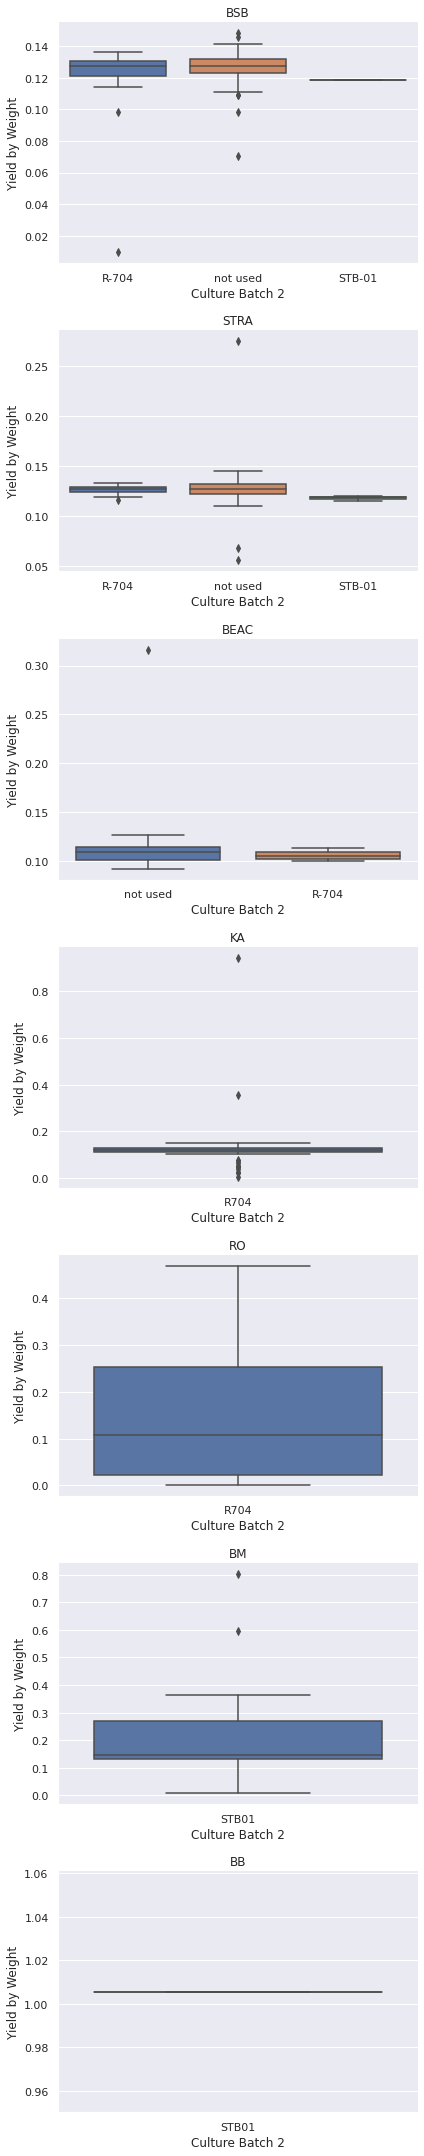

In [ ]:
g = sns.catplot(
    x="culture_2_id", y="yield_by_weight", row="prod_code",
    height=3, aspect=2, data=df_cheese_not_territorial, kind="box",
    sharey=False, sharex=False)

g.set_titles("{row_name}")
g.set(xlabel='Culture Batch 2', ylabel='Yield by Weight')
plt.subplots_adjust(bottom=-0.4)
plt.show()

In [ ]:
# df_ = df_cheese_not_territorial[df_cheese_not_territorial['prod_code'] == 'STRA']
# df_[df_['culture_2_id'] == 'not used']['culture_2_qty'].isna().sum()

For each of these cheese products, lets do some ANOVA tests to statistically compare the means of each culture batch for each cheese product to find any significant differences:

#### 1. Culture Batch 1 ANOVA

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Run ANOVA on the entire data. DONE
# Remove outlier(s) and rerun the ANOVA. DONE
# If the results are the same then you can report the analysis on the full data and report
# that the outliers did not influence the results. DONE

In [ ]:
def remove_outliers(df, col):
    df_copy = df.copy()
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    filter_ = (df_copy[col] >= Q1 - 1.5 * IQR) & (df_copy[col] <= Q3 + 1.5 *IQR)
    df_copy = df_copy.loc[filter_]
    return df_copy

In [ ]:
import scipy.stats as stats

def one_way_anova(df, group_var, dep_var, ignore_outliers=False, post_hoc=True):
    df_not_null = df[~df[group_var].isna()].reset_index().sort_values(group_var)

    if ignore_outliers:
        Q1 = df_not_null[dep_var].quantile(0.25)
        Q3 = df_not_null[dep_var].quantile(0.75)
        IQR = Q3 - Q1
        filter_ = (df_not_null[dep_var] >= Q1 - 1.5 * IQR) & (df_not_null[dep_var] <= Q3 + 1.5 *IQR)
        df_not_null = df_not_null.loc[filter_]

    groups = df_not_null[group_var].dropna().unique()
    groups_data = [df_not_null[df_not_null[group_var] == group][dep_var] for group in groups]
    fvalue, pvalue = stats.f_oneway(*groups_data)

    if post_hoc:
        tukey = pairwise_tukeyhsd(endog=df_not_null[dep_var],
                                  groups=df_not_null[group_var],
                                  alpha=0.05)

        print(tukey)
    return fvalue, pvalue

In [ ]:
prod_codes = ['BSB', 'STRA', 'BEAC', 'KA', 'RO', 'BM', 'BB']
group_var = 'culture_1_id'
anova_results = []

for prod_code in prod_codes:
    print(prod_code)
    df_cheese_product = df_cheese[df_cheese['prod_code'] == prod_code]
    fvalue, pvalue = one_way_anova(
        df_cheese_product, group_var=group_var, dep_var='yield_by_weight', ignore_outliers=True, post_hoc=True) # True
    anova_results.append((prod_code, pvalue))

df_results = pd.DataFrame(anova_results, columns=['product_code', 'p_value'])
df_results.sort_values('p_value')

BSB
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
CHN-11 CHN-13  -0.0002   0.9 -0.0021 0.0017  False
CHN-11 CHN-19   0.0002   0.9 -0.0017 0.0021  False
CHN-11     FD   0.0002   0.9 -0.0033 0.0037  False
CHN-13 CHN-19   0.0004   0.9 -0.0015 0.0024  False
CHN-13     FD   0.0004   0.9 -0.0031  0.004  False
CHN-19     FD     -0.0   0.9 -0.0035 0.0035  False
--------------------------------------------------
STRA
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
CHN-11 CHN-13   0.0005    0.9 -0.0019 0.0028  False
CHN-11 CHN-19   0.0021 0.1215 -0.0003 0.0045  False
CHN-11     FD  -0.0011 0.8916 -0.0053  0.003  False
CHN-13 CHN-19   0.0016 0.3652 -0.0009 0.0041  False
CHN-13     FD  -0.0016 0.7286 -0.0058 0.0026  False
CHN-19     FD  -0.0032 0.2138 -0.0075 0.0011  False
------------

product_code   p_value
5           BM  0.000003
6           BB  0.020473
1         STRA  0.086058
3           KA  0.117350
4           RO  0.440002
2         BEAC  0.812319
0          BSB  0.948429

In [ ]:
df_ = df_cheese[df_cheese['prod_code'] == 'BM']
df_[df_['culture_1_id'] == 'FD'].count()

run_id                21
start_date            21
start_time            21
run_name              21
cheese_type           21
prod_code             21
batch_no              21
vat_used              21
stock_tank_1          21
stock_tank_2          21
milk_volume           21
milk_fat_pc           21
milk_protein_pc       21
milk_fat_total        21
milk_protein_total    21
culture_1_id          21
culture_2_id          21
culture_1_qty         21
culture_1_bv          21
culture_2_qty         21
culture_2_bv          21
culture_qty_total     21
culture_total_bv      21
rennet_qty            21
rennet_qty_bv         21
rennet_temp           21
floculation_time      21
hardening_ratio       21
process_time          21
yield_by_weight       21
dtype: int64

From the above tests, we use a one-way ANOVA to test if there are significant differences between culture batches for a given cheese product.

With a significance level of 0.05, we find only the **BM cheese product for culture batch 1** has a significant difference on the output yield when different culture batch types are considered for culture batch 1.

When 'outliers' are removed (i.e. values which lie outside the interquartile range), we find **both BM and BB cheese products** have significant differences between culture batch types.

#### 2. Culture Batch 2 ANOVA

In [ ]:
# Run ANOVA on the entire data. DONE
# Remove outlier(s) and rerun the ANOVA. DONE
# If the results are the same then you can report the analysis on the full data and report
# that the outliers did not influence the results. DONE

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

should_remove_outliers = False

df_cheese_product = df_cheese[df_cheese['prod_code'] == 'BEAC']

if should_remove_outliers:
    df_cheese_product = remove_outliers(df_cheese_product, col='yield_by_weight')

model = ols('yield_by_weight ~ C(culture_2_id)', data=df_cheese_product).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq    df         F    PR(>F)
C(culture_2_id)  0.000139   1.0  0.131734  0.718419
Residual         0.045518  43.0       NaN       NaN

In [ ]:
prod_codes = ['BSB', 'STRA', 'BEAC']
group_var = 'culture_2_id'
anova_results = []

for prod_code in prod_codes:
    print(prod_code)
    df_cheese_product = df_cheese[df_cheese['prod_code'] == prod_code]
    fvalue, pvalue = one_way_anova(
        df_cheese_product, group_var=group_var, dep_var='yield_by_weight', ignore_outliers=False)
    anova_results.append((prod_code, fvalue, pvalue))

df_results = pd.DataFrame(anova_results, columns=['product_code', 'f_value', 'p_value'])
df_results.sort_values('p_value')

BSB
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 R-704   STB-01  -0.0034    0.9 -0.0257 0.0189  False
 R-704 not used   0.0047 0.0217  0.0005 0.0088   True
STB-01 not used    0.008 0.6521 -0.0139   0.03  False
-----------------------------------------------------
STRA
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 R-704   STB-01  -0.0081 0.6622 -0.0308 0.0146  False
 R-704 not used   0.0006    0.9 -0.0091 0.0104  False
STB-01 not used   0.0087 0.5804 -0.0122 0.0297  False
-----------------------------------------------------
BEAC
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 R-704 not used   0.0071 0.7292 -0.0322 0.0463  False
--------------

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


product_code   f_value   p_value
0          BSB  3.893033  0.021224
1         STRA  0.492896  0.611803
2         BEAC  0.131734  0.718419

See report for analysis.

#### 3. VAT's ANOVA (not included in report, didn't have time!)

In [ ]:
prod_codes = df_cheese['prod_code'].unique()
group_var = 'vat_used'
anova_results = []

for prod_code in prod_codes:
    print(prod_code)
    df_cheese_product = df_cheese[df_cheese['prod_code'] == prod_code]
    if len(df_cheese_product[group_var].unique()) >= 2:
        fvalue, pvalue = one_way_anova(
            df_cheese_product, group_var=group_var, dep_var='yield_by_weight', ignore_outliers=True)
        anova_results.append((prod_code, pvalue))

df_results = pd.DataFrame(anova_results, columns=['product_code', 'p_value'])
df_results.sort_values('p_value')

CRMY
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10K    12K   -0.002 0.0173 -0.0037 -0.0003   True
   10K    17K  -0.0012 0.5298 -0.0037  0.0014  False
   12K    17K   0.0008 0.6861 -0.0016  0.0033  False
----------------------------------------------------
RL
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10K    12K  -0.0027  0.001 -0.0041 -0.0012   True
   10K    17K  -0.0004 0.8745 -0.0027  0.0018  False
   12K    17K   0.0022 0.0333  0.0001  0.0043   True
----------------------------------------------------
CRBLY
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   10K    12K  -0.0013 0.5902 -0.0046 0.0019  False
   10K    17K   0.0002    0.9 -0.004

product_code   p_value
1            RL  0.000037
11           BM  0.000328
10           RO  0.010736
0          CRMY  0.023915
4            DG  0.086654
9            KA  0.126244
8          CHED  0.301533
3          TRAD  0.338018
12           BB  0.380018
6           BSB  0.446429
2         CRBLY  0.492974
7          STRA  0.508746
5            SN  0.702855
13          BFC  0.963279

In [ ]:
vat_levels = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','10K','12K','17K']

In [ ]:
df_cheese['vat_used'] = df_cheese['vat_used'].astype('category')
df_cheese['vat_used'] = df_cheese['vat_used'].cat.reorder_categories(vat_levels)

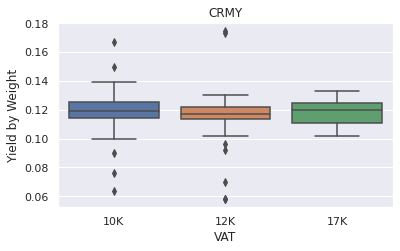

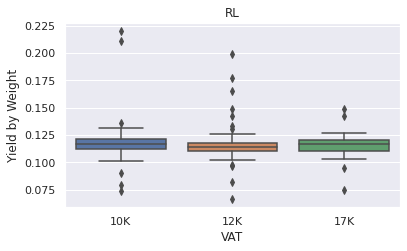

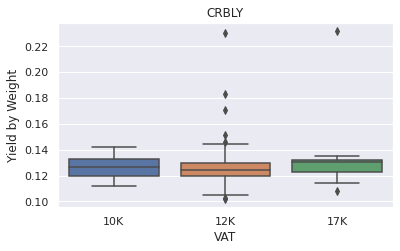

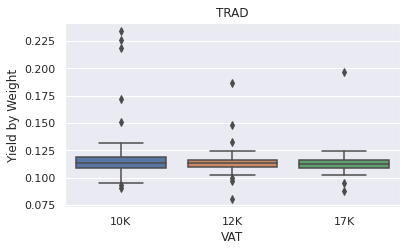

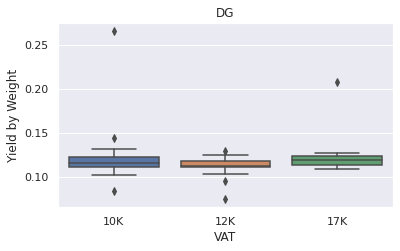

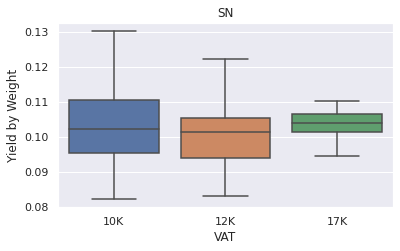

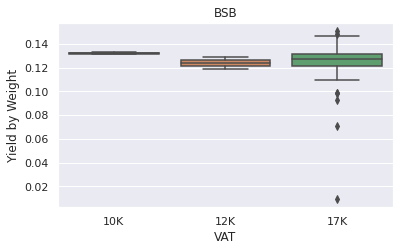

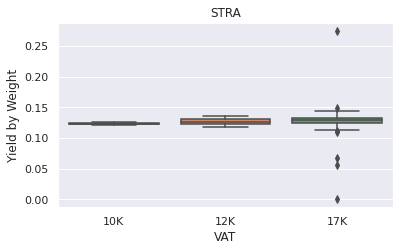

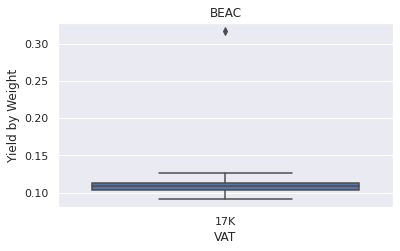

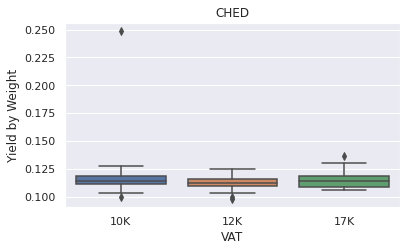

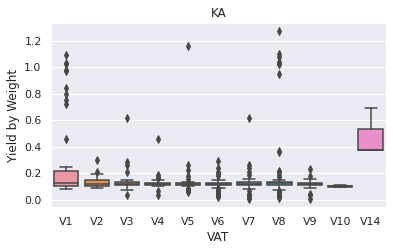

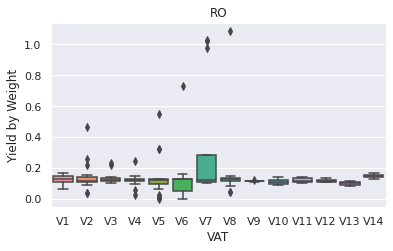

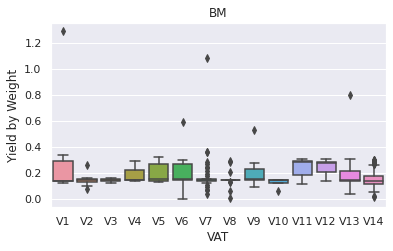

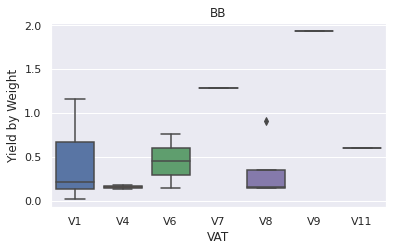

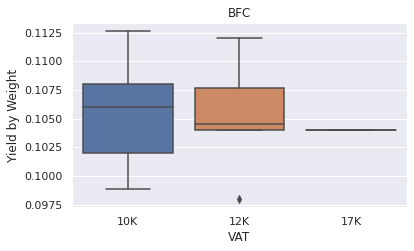

In [ ]:
for prod_code in df_cheese['prod_code'].unique():
    df_prod_code = df_cheese[df_cheese['prod_code'] == prod_code]
    order = [cat for cat in vat_levels if df_prod_code['vat_used'].str.contains(cat).any()]
    fig, ax = plt.subplots(figsize=(6,2))
    ax = sns.boxplot(x="vat_used", y="yield_by_weight", data=df_prod_code, order=order)
    ax.set(title=prod_code, xlabel='VAT', ylabel='Yield by Weight')
    plt.subplots_adjust(bottom=-0.4)
    plt.show()

### Statistical Tests

The one-way ANOVA test results may not be truly correct, given that we must ensure group variances are roughly equal and each groups values roughly follow a normal distribution.

Let's have a look at the distributions:

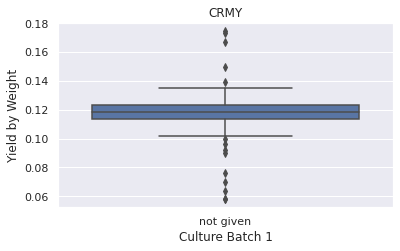

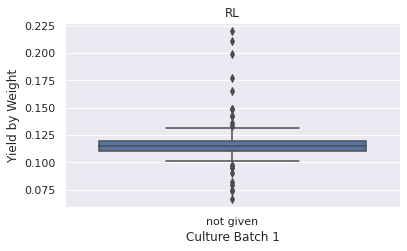

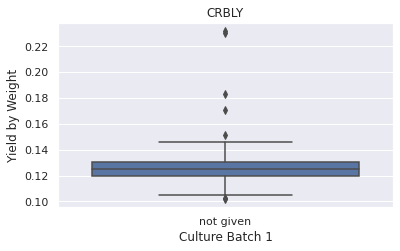

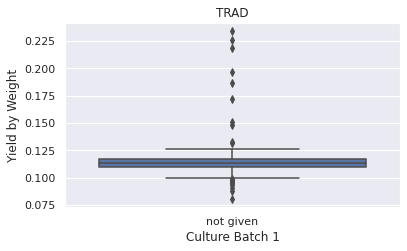

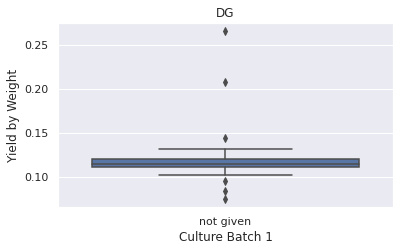

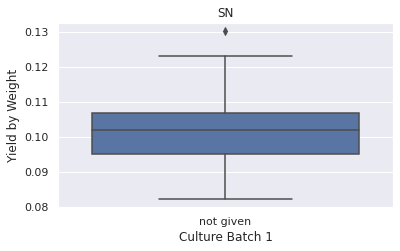

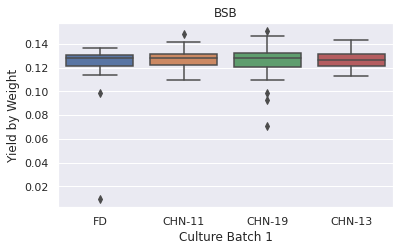

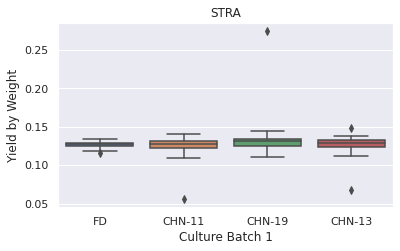

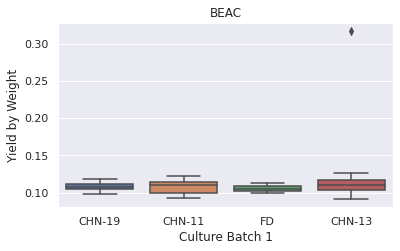

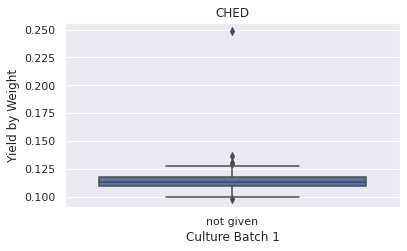

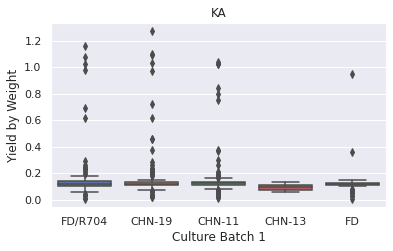

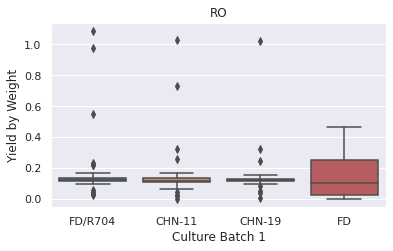

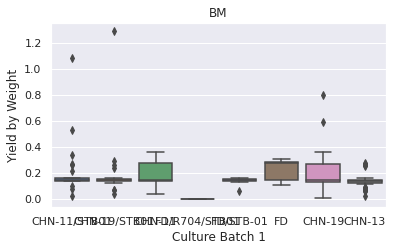

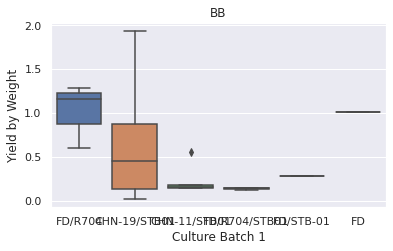

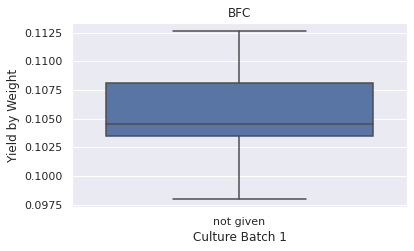

In [ ]:
for prod_code in df_cheese['prod_code'].unique():
    df_prod_code = df_cheese[df_cheese['prod_code'] == prod_code]
    fig, ax = plt.subplots(figsize=(6,2))
    ax = sns.boxplot(x="culture_1_id", y="yield_by_weight", data=df_prod_code)
    ax.set(title=prod_code, xlabel='Culture Batch 1', ylabel='Yield by Weight')
    plt.subplots_adjust(bottom=-0.4)
    plt.show()

Given different cheese products have different culture batches, lets look at the counts of how many culture batches are use per cheese product (not territorial):

In [ ]:
df_cheese_not_territorial['culture_1_id'].unique()

array(['FD', 'CHN-11', 'CHN-19', 'CHN-13', 'FD/R704', 'CHN-11/STB01',
       'CHN-19/STB01', nan, 'FD/R704/STB01', 'FD/STB-01'], dtype=object)

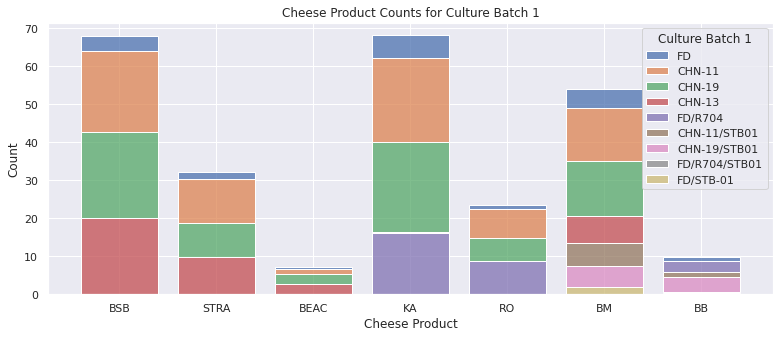

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.histplot(
    df_cheese_not_territorial,
    x='prod_code',
    weights='yield_by_weight',
    hue='culture_1_id',
    multiple='stack',
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Cheese Product Counts for Culture Batch 1')
ax.get_legend().set_title("Culture Batch 1")
ax.set(xlabel='Cheese Product')
plt.savefig('vis/culture_1_id_counts_per_cheese_product.png', dpi=300)
plt.show()

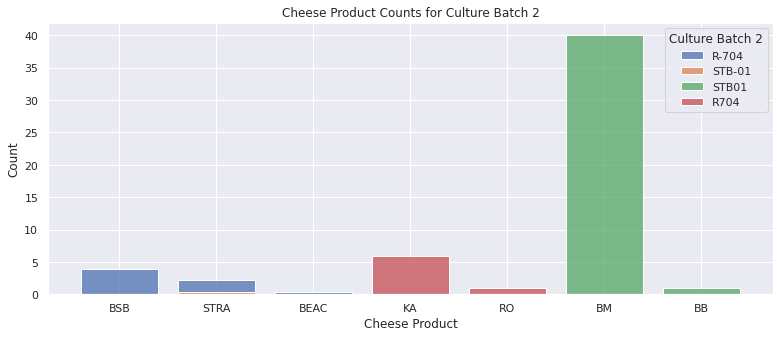

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.histplot(
    df_cheese_not_territorial[df_cheese_not_territorial['culture_2_id'] != 'not used'],
    x='prod_code',
    weights='yield_by_weight',
    hue='culture_2_id',
    multiple='stack',
    edgecolor='white',
    shrink=0.8
)

ax.set_title('Cheese Product Counts for Culture Batch 2')
ax.get_legend().set_title("Culture Batch 2")
ax.set(xlabel='Cheese Product')
plt.savefig('vis/culture_2_id_counts_per_cheese_product.png', dpi=300)
plt.show()

#### Q: What percentage of the data has 'unusually' large `yield_by_weight` values?

In [ ]:
# (len(df_cheese_filtered[df_cheese_filtered['yield_by_weight'] > 0.2]) / len(df_cheese_filtered)) * 100

In [ ]:
# fig, ax = plt.subplots(figsize=(16,6))
# ax = sns.boxplot(
#     x="prod_code",
#     y="rennet_temp",
#     data=df_cheese_filtered
# )

In [ ]:
# fig, ax = plt.subplots(figsize=(16,6))
# ax = sns.boxplot(
#     x="prod_code",
#     y="process_time",
#     data=df_cheese_filtered
# )

In [ ]:
# 10K 12K 17K
# 0.1
#

In [ ]:
# 3D plots
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap

# # axes instance
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

# # get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# # plot
# sc = ax.scatter(
#     df_cheese_filtered['milk_volume'],
#     df_cheese_filtered['rennet_temp'],
#     df_cheese_filtered['yield_by_weight'],
#     s=40,
#     c=df_cheese_filtered['yield_by_weight'],
#     marker='o',
#     cmap=cmap,
#     alpha=1
# )
# ax.set_xlabel('milk_volume')
# ax.set_ylabel('rennet_temp')
# ax.set_zlabel('yield_by_weight')

# # legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
# # fig, ax = plt.subplots(figsize=(16,6))
# ax = sns.catplot(
#     x="vat_used",
#     y="yield_by_weight",
#     col="prod_code",
#     col_wrap=3,
#     kind='box',
#     sharex=False,
#     sharey=False,
#     data=df_cheese_filtered[df_cheese_filtered['cheese_type'] == 'soft']
# )

Let's have a look at the boxplots per VAT per product:

In [ ]:
vat_levels = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','10K','12K','17K']

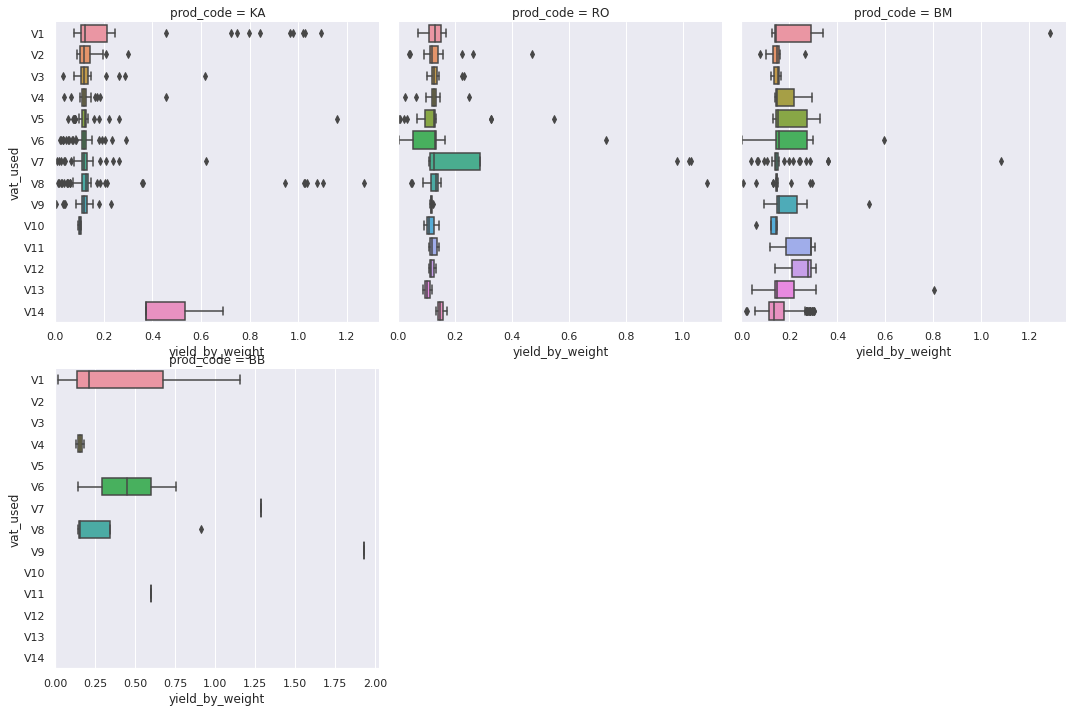

In [ ]:
ax = sns.catplot(
    x="yield_by_weight",
#     y="prod_code",
    y="vat_used",
    col="prod_code",
    col_wrap=3,
    height=5,
    aspect=1,
    kind='box', # 'box'
    sharex=False,
    order=vat_levels[:-3],
    data=df_cheese[df_cheese['cheese_type'] == 'soft']
)
ax.set(xlim=(0, None), xlabel='yield_by_weight')
plt.show()

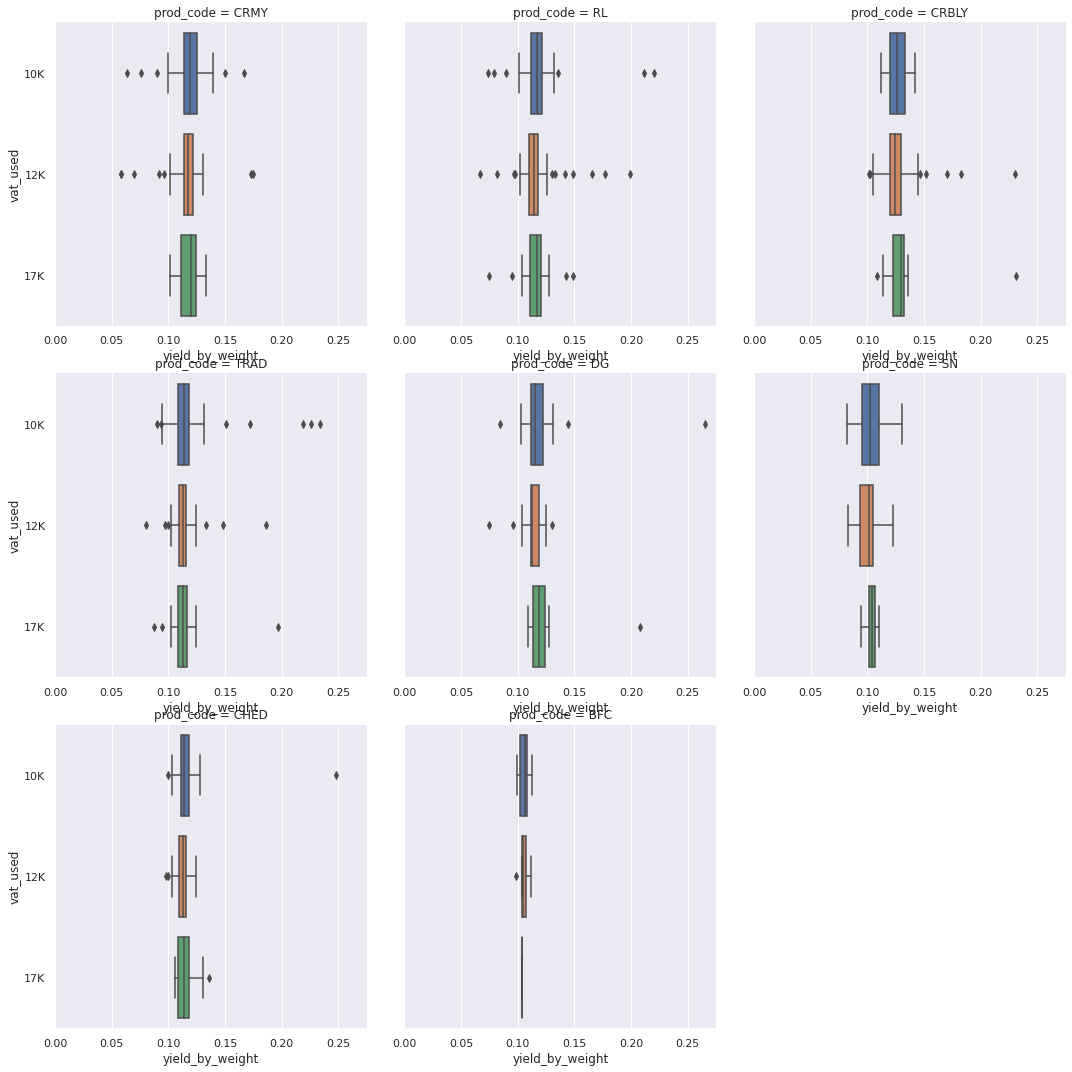

In [ ]:
ax = sns.catplot(
    x="yield_by_weight",
#     y="prod_code",
    y="vat_used",
    col="prod_code",
    col_wrap=3,
    height=5,
    aspect=1,
    kind='box', # 'box'
    sharex=False,
    order=vat_levels[-3:],
    data=df_cheese[df_cheese['cheese_type'] == 'territorial']
)
ax.set(xlim=(0, 0.275), xlabel='yield_by_weight')
plt.show()

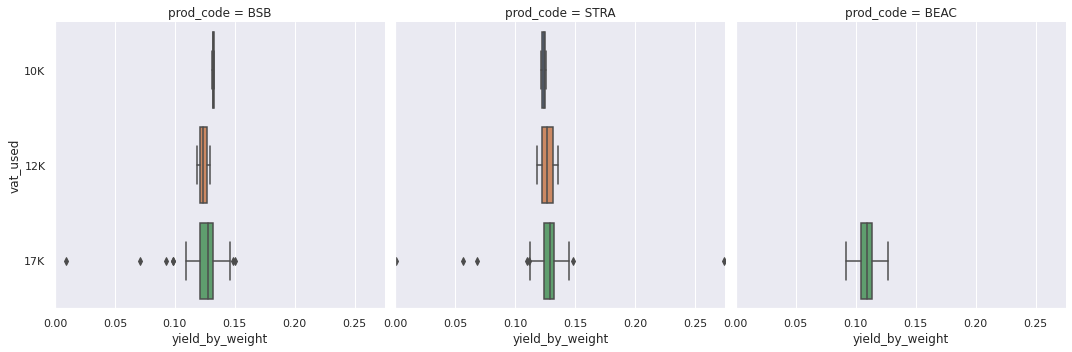

In [ ]:
ax = sns.catplot(
    x="yield_by_weight",
#     y="prod_code",
    y="vat_used",
    col="prod_code",
    col_wrap=3,
    height=5,
    aspect=1,
    kind='box', # 'box'
    sharex=False,
    order=vat_levels[-3:],
    data=df_cheese[df_cheese['cheese_type'] == 'blue']
)
ax.set(xlim=(0, 0.275), xlabel='yield_by_weight')
plt.show()

Lets have a look at the count distribution per VAT per product

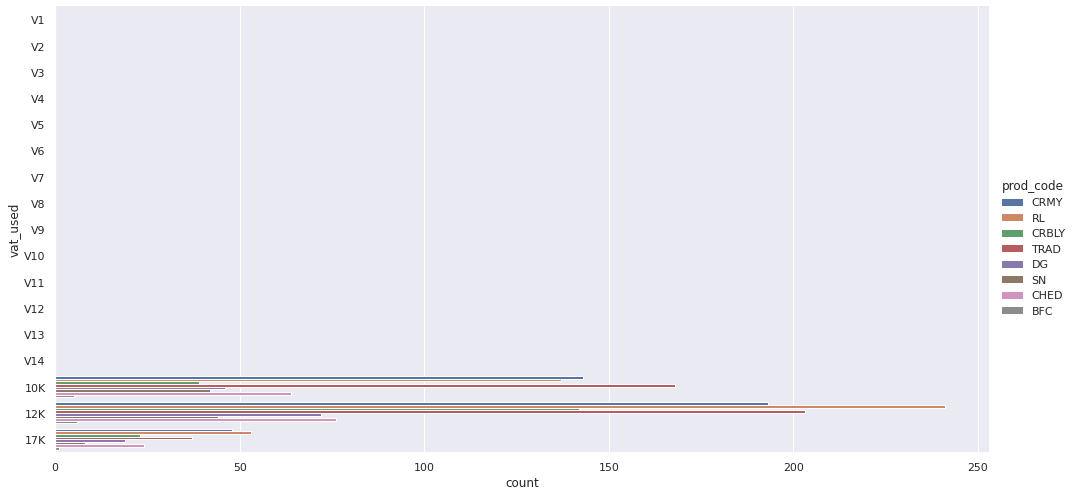

In [ ]:
g = sns.catplot(y="vat_used", hue="prod_code",
                data=df_cheese[df_cheese['cheese_type'] == 'territorial'], kind="count",
                height=7, aspect=2);

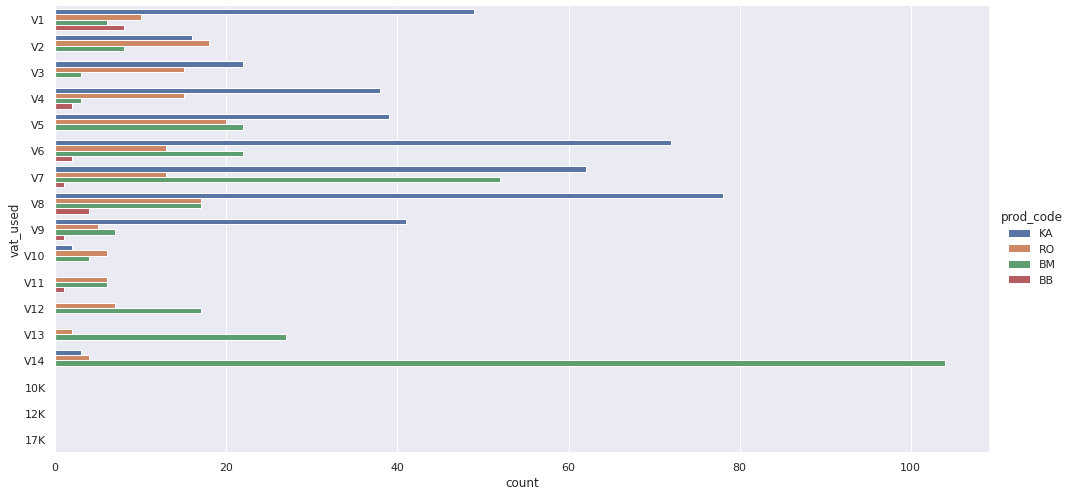

In [ ]:
g = sns.catplot(y="vat_used", hue="prod_code",
                data=df_cheese[df_cheese['cheese_type'] == 'soft'], kind="count",
                height=7, aspect=2);

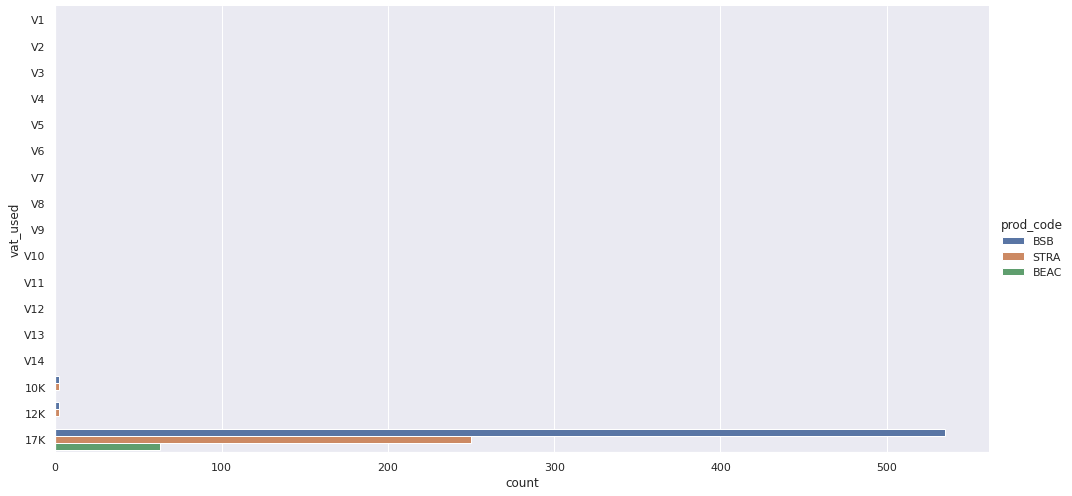

In [ ]:
g = sns.catplot(y="vat_used", hue="prod_code",
                data=df_cheese[df_cheese['cheese_type'] == 'blue'], kind="count",
                height=7, aspect=2);

In [ ]:
df_cheese['cheese_type'].unique()

array(['territorial', 'blue', 'soft'], dtype=object)

In [ ]:
df_cheese['vat_used'].unique()

['12K', '10K', '17K', 'V1', 'V2', ..., 'V12', 'V13', 'V10', 'V14', NaN]
Length: 18
Categories (17, object): ['V1', 'V2', 'V3', 'V4', ..., 'V14', '10K', '12K', '17K']

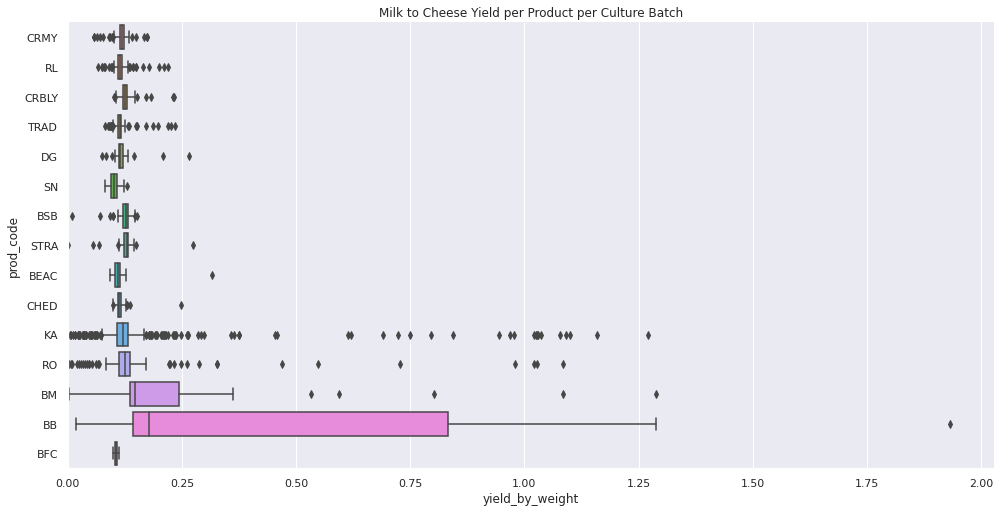

In [ ]:
ax = sns.catplot(
    x="yield_by_weight",
    y="prod_code",
#     hue="culture_1_id",
#     row="prod_code",
    height=7,
    aspect=2,
    kind='box',
    sharex=False,
#     hue_order=vat_levels[:-3],
    data=df_cheese
)
ax.set(xlim=(0, None), title='Milk to Cheese Yield per Product per Culture Batch')
plt.show()

In [ ]:
df_cheese[df_cheese['cheese_type'] == 'soft']

run_id start_date start_time  run_name cheese_type prod_code  batch_no  \
604      605     7/2/19    6:35:00    918321        soft        KA  20190702   
605      606     7/2/19    6:38:00    918322        soft        KA  20190705   
606      607     7/2/19    6:41:00    918323        soft        KA  20190705   
607      608     7/2/19    6:44:00    918324        soft        KA  20190705   
608      609     7/2/19    6:46:00    918325        soft        KA  20190705   
...      ...        ...        ...       ...         ...       ...       ...   
3542    3543     3/9/22    6:40:00    206821        soft        KA  20220309   
3543    3544     3/9/22    7:15:00    206841        soft        BM  20220309   
3547    3548    3/10/22    7:05:00    206941        soft        BM  20220310   
3552    3553    3/14/22    6:40:00    207321        soft        KA  20220314   
3561    3562    3/16/22    6:45:00    207521        soft        KA  20220316   

     vat_used stock_tank_1 stock_tank_2  ...  culture_2_bv  culture_qty_total  \
604        V1      unknown     not used  ...           NaN              100.0   
605        V2      unknown     not used  ...           NaN              100.0   
606        V3      unknown     not used  ...           NaN              100.0   
607        V4      unknown     not used  ...           NaN              100.0   
608        V5      unknown     not used  ...           NaN              100.0   
...       ...          ...          ...  ...           ...                ...   
3542       V8           T4     not used  ...           NaN              150.0   
3543       V6           S1     not used  ...        0.0064               75.0   
3547       V6           S2     not used  ...        0.0064               61.0   
3552       V8           T4     not used  ...           NaN              150.0   
3561       V8           T4     not used  ...        0.0087              100.0   

      culture_total_bv  rennet_qty  rennet_qty_bv rennet_temp  \
604             0.1667          40         0.0667        33.2   
605             0.1667          40         0.0667        32.6   
606             0.1667          40         0.0667        33.2   
607             0.1667          40         0.0667        32.5   
608             0.1667          40         0.0667        32.4   
...                ...         ...            ...         ...   
3542            0.0276          47         0.0086        37.9   
3543            0.0192          49         0.0126        36.8   
3547            0.0156          49         0.0126        36.6   
3552            0.0268          47         0.0084        33.4   
3561            0.0175          47         0.0082        33.7   

     floculation_time  hardening_ratio  process_time  yield_by_weight  
604              10.0             4.00          0.94           0.2474  
605               9.0             4.00          0.93           0.1204  
606               9.0             4.33          0.93           0.1356  
607               9.0             4.11          0.93           0.1454  
608               9.0             4.00          0.93           0.2195  
...               ...              ...           ...              ...  
3542              7.9             4.05         22.83           0.1400  
3543             14.2             4.23         23.00           0.1476  
3547             13.7             4.09         23.25           0.1413  
3552              8.1             4.44         23.67           0.1306  
3561              9.1             4.40         22.75           0.1210  

[891 rows x 30 columns]

Why is there a fluctuation in yields between VAT's for the same type of cheese (i.e. same properties)? Which of the recorded, controllable variables explain this?

What is the distribution of milk volume recorded in each VAT for each cheese product?

In [ ]:
df_cheese['cheese_type'].value_counts()

territorial    1834
soft            891
blue            856
Name: cheese_type, dtype: int64

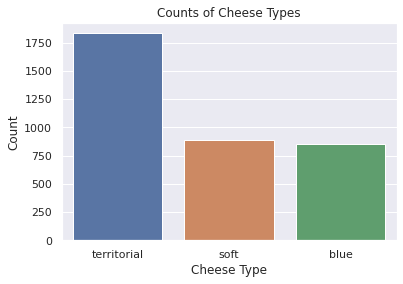

In [ ]:
ax = sns.countplot(
    x="cheese_type", data=df_cheese, order=df_cheese['cheese_type'].value_counts().index)
ax.set(title='Counts of Cheese Types', xlabel='Cheese Type', ylabel='Count')
plt.savefig('vis/cheese_type_counts.png', dpi=300)
plt.show()

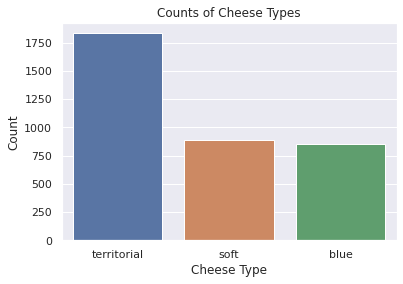

In [ ]:
ax = sns.countplot(
    x="cheese_type", data=df_cheese, order=df_cheese['cheese_type'].value_counts().index)
ax.set(title='Counts of Cheese Types', xlabel='Cheese Type', ylabel='Count')
plt.savefig('vis/cheese_type_counts.png', dpi=300)
plt.show()

In [ ]:
# culture_1_id can have NaN values as well as 'not used'!
df_cheese[
    df_cheese['culture_1_id'].isin(['not given'])
]['culture_1_id'].count()

1834

In [ ]:
sum(df_cheese['culture_1_id'].isna())

3

In [ ]:
# Assert territorial cheese has values of 'not given'
df_territorial = df_cheese[df_cheese['cheese_type'] == 'territorial']
assert len(df_territorial[df_territorial['culture_1_id'] == 'not given']) == df_cheese[
    df_cheese['culture_1_id'].isin(['not given'])
]['culture_1_id'].count()

In [ ]:
# culture_2_id can have NaN values as well as 'not used'!
df_cheese[
    df_cheese['culture_2_id'].isin(['not used', 'not given'])
]['culture_2_id'].count()

1094

In [ ]:
sum(df_cheese['culture_2_id'].isna())

2160

In [ ]:
2160 + 1094

3254

In [ ]:
# Find cases where culture_1_id has no value, and culture_1_qty does!
df_cheese[df_cheese['culture_1_id'] == 'not given']['culture_1_qty'].sort_values()

61        45.0
1386      50.0
575      125.0
2622     125.0
636      125.0
         ...  
55      5000.0
50      5000.0
34      5000.0
211     5000.0
16      5000.0
Name: culture_1_qty, Length: 1834, dtype: float64

In [ ]:
# Find cases where culture_2_id has no value, and culture_2_qty does!
sum(df_cheese[df_cheese['culture_2_id'] == 'not given']['culture_2_qty'].isna())

0

In [ ]:
df_cheese[df_cheese['culture_2_bv'].isna()]

run_id start_date start_time  run_name  cheese_type prod_code  batch_no  \
0          1    7/18/18    5:00:00    819901  territorial      CRMY  20180718   
1          2    7/19/18    3:20:00    820001  territorial      CRMY  20180719   
2          3    7/20/18    4:35:00   8200102  territorial      CRMY  20180720   
3          4    7/23/18    3:20:00    820401  territorial      CRMY  20180723   
4          5    7/23/18    6:15:00    820402  territorial      CRMY  20180723   
...      ...        ...        ...       ...          ...       ...       ...   
3572    3573    3/21/22    9:20:00    208012         blue       BSB  20220321   
3576    3577    3/23/22    6:25:00    208202  territorial        RL  20220323   
3578    3579    3/24/22    3:50:00    208301  territorial        SN  20220324   
3579    3580    3/24/22    5:20:00    208302  territorial      CRMY  20220324   
3580    3581    3/24/22    8:30:00    208303  territorial      CRMY  20220324   

     vat_used stock_tank_1 stock_tank_2  ...  culture_2_bv  culture_qty_total  \
0         12K           S1     not used  ...           NaN              500.0   
1         10K           S2     not used  ...           NaN              500.0   
2         10K           S1     not used  ...           NaN              500.0   
3         12K           S2     not used  ...           NaN              625.0   
4         10K           S2     not used  ...           NaN              500.0   
...       ...          ...          ...  ...           ...                ...   
3572      17K           S2           S1  ...           NaN             2000.0   
3576      10K           S2     not used  ...           NaN              500.0   
3578      12K           T4           T3  ...           NaN              250.0   
3579      17K           S1           S2  ...           NaN              625.0   
3580      12K           S2     not used  ...           NaN              625.0   

      culture_total_bv  rennet_qty  rennet_qty_bv rennet_temp  \
0               0.0500         600           0.06          32   
1               0.0500         600           0.06        32.5   
2               0.0500         600           0.06          33   
3               0.0521         720           0.06        32.7   
4               0.0500         600           0.06        32.9   
...                ...         ...            ...         ...   
3572            0.1176        1360           0.08          33   
3576            0.0500         600           0.06        32.5   
3578            0.0505         297           0.06        33.9   
3579            0.0481         780           0.06        32.3   
3580            0.0521         720           0.06        32.4   

     floculation_time  hardening_ratio  process_time  yield_by_weight  
0                25.0             2.40          4.17           0.1180  
1                23.0             2.61          4.08           0.1100  
2                24.0             2.50          4.25           0.1100  
3                24.0             2.50          4.22           0.1117  
4                25.0             2.60          4.42           0.1120  
...               ...              ...           ...              ...  
3572             16.0             4.00         28.92           0.1163  
3576             23.0             2.57          3.75           0.1154  
3578             14.0             2.50          3.17           0.1051  
3579             24.0             2.58          4.33           0.1077  
3580             23.0             2.57          4.78           0.1150  

[2679 rows x 30 columns]

## 2. Modelling

### Predictive Model for Cheese Yield

In [ ]:
# Useful tutorial: https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_cheese.drop(['yield_by_weight'], axis=1)
y = df_cheese['yield_by_weight']

# Split dataset into train and test, and maintain cheese proportions in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['cheese_type'])

In [ ]:
X_train.shape, X_test.shape

((2864, 29), (717, 29))

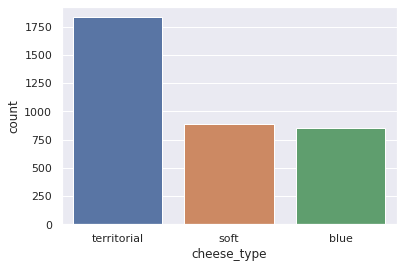

In [ ]:
ax = sns.countplot(x="cheese_type", data=X, order=X['cheese_type'].value_counts().index)
plt.show()

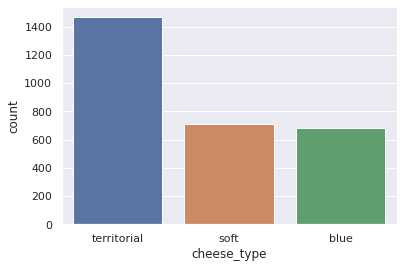

In [ ]:
ax = sns.countplot(x="cheese_type", data=X_train, order=X['cheese_type'].value_counts().index)
plt.show()

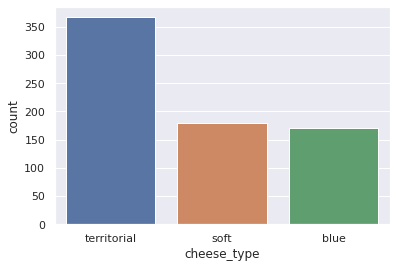

In [ ]:
ax = sns.countplot(x="cheese_type", data=X_test, order=X['cheese_type'].value_counts().index)
plt.show()

In [ ]:
X_train

run_id start_date start_time  run_name  cheese_type prod_code  batch_no  \
28        29    8/16/18    6:20:00    822802  territorial      CRMY  20180816   
318      319     3/4/19    4:45:00    906302  territorial      CRMY  20190304   
1332    1333    2/11/20    3:30:00      4201  territorial        RL  20200211   
1304    1305     2/3/20    6:13:00      3421         soft        KA  20200203   
1402    1403     3/2/20    7:15:00      6212         blue       BSB  20200302   
...      ...        ...        ...       ...          ...       ...       ...   
1356    1357    2/17/20   14:08:00      4841         soft        BB  20200217   
2493    2494     3/4/21    6:30:00    106302  territorial        SN  20210304   
672      673    7/25/19    5:00:00    920611         blue       BSB  20190725   
1879    1880     7/9/20    7:03:00     19131         soft        RO  20200710   
360      361    3/26/19    8:20:00    908502  territorial      CRMY  20190326   

     vat_used stock_tank_1 stock_tank_2  ...  culture_2_qty  culture_2_bv  \
28        12K           S2     not used  ...            NaN           NaN   
318       10K           S2     not used  ...            NaN           NaN   
1332      12K           S1     not used  ...            NaN           NaN   
1304       V2      unknown     not used  ...            NaN           NaN   
1402      10K           S1     not used  ...            NaN           NaN   
...       ...          ...          ...  ...            ...           ...   
1356       V1      unknown     not used  ...            NaN           NaN   
2493      17K           T3     not used  ...            NaN           NaN   
672       17K           S1     not used  ...         1000.0        0.0588   
1879       V2           T4     not used  ...            NaN           NaN   
360       12K           S2     not used  ...            NaN           NaN   

      culture_qty_total  culture_total_bv  rennet_qty rennet_qty_bv  \
28                625.0            0.0521         720        0.0600   
318               500.0            0.0500         600        0.0600   
1332              500.0            0.0417         720        0.0600   
1304              100.0            0.0833          40        0.0333   
1402             2000.0            0.1176        1360        0.0800   
...                 ...               ...         ...           ...   
1356               62.5            0.1042          45        0.0750   
2493              300.0            0.0458         394        0.0601   
672              2000.0            0.1176        1360        0.0800   
1879              100.0            0.1053          40        0.0421   
360               625.0            0.0521         720        0.0600   

     rennet_temp  floculation_time  hardening_ratio  process_time  
28          32.5              22.0             2.73         28.17  
318         32.5              21.0             2.86          4.25  
1332        32.3              24.0             2.58          4.00  
1304        33.8               9.0             4.00         23.02  
1402        32.8              15.0             4.00         35.00  
...          ...               ...              ...           ...  
1356        35.1              15.0             5.00         23.00  
2493        32.6              12.0             3.00          3.42  
672         33.2              15.0             4.00         26.25  
1879        33.2               9.0             4.00         23.12  
360         33.5              22.0             2.73          4.42  

[2864 rows x 29 columns]

In [ ]:
# Create numerical pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder())
])

In [ ]:
# Select numeric columns
numeric_features = X.select_dtypes(include=[np.number]).columns

# Select categorical columns
categorical_features = ['cheese_type', 'prod_code', 'vat_used']

In [ ]:
# Combine numeric and categorical columns into ColumnTransformer preprocessor
preprocessor = ColumnTransformer(
   transformers=[
       ('numeric', numeric_transformer, numeric_features),
       ('categorical', categorical_transformer, categorical_features)
    ]
)

In [ ]:
regressors = [
    MLPRegressor(),
    RandomForestRegressor()
]

for regressor in regressors:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    model = pipeline.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(regressor)
    print(f'Model r2 score: {r2_score(y_test, predictions)}')
    print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False)}\n')

MLPRegressor()
Model r2 score: 0.30834780700429654
RMSE: 0.08781327990367876

RandomForestRegressor()
Model r2 score: 0.7004322722659466
RMSE: 0.057791482079895845



In [ ]:
# Cross-validated randomized hyperparameter search
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf),
])

# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=random_grid,
    n_iter=50,
    cv=10,
    verbose=3,
    random_state=42,
    n_jobs=-1

)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['milk_volume', 'milk_fat_pc', 'milk_protein_pc', 'milk_fat_total',
       'milk_protein_total', 'rennet_qty', 'rennet_qty_bv', 'rennet_temp',
       'floculation_ti...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__bootstrap': [T

In [ ]:
set_config(display="diagram")
rf_random

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['milk_volume', 'milk_fat_pc', 'milk_protein_pc', 'milk_fat_total',
       'milk_protein_total', 'rennet_qty', 'rennet_qty_bv', 'rennet_temp',
       'floculation_ti...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__bootstrap': [True, False],
                                        'regressor__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110,
                                                                 None],
                                        'regressor__max_features': ['auto',
                                                                    'sqrt'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [200, 400,
                                                                    600, 800,
                                                                    1000, 1200,
                                                                    1400, 1600,
                                                                    1800,
                                                                    2000]},
                   random_state=42, verbose=3)

In [ ]:
print('Best Hyperparameters: %s' % rf_random.best_params_)

Best Hyperparameters: {'regressor__n_estimators': 800, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 50, 'regressor__bootstrap': False}


In [ ]:
def evaluate(pipeline, X_train, y_train, X_test, y_test):
    print('Model train accuracy: {:0.2f}%'.format(pipeline.score(X_train, y_train) * 100))
    print('Model test accuracy: {:0.2f}%'.format(pipeline.score(X_test, y_test) * 100))

In [ ]:
evaluate(rf_random, X_train, y_train, X_test, y_test)

Model train accuracy: 83.84%
Model test accuracy: 63.92%


In [ ]:
X_test.iloc[0]

cheese_type           territorial
prod_code                    CHED
vat_used                      10K
milk_volume                 10000
milk_fat_pc                  4.51
milk_protein_pc              3.62
milk_fat_total              451.0
milk_protein_total          362.0
rennet_qty                    600
rennet_qty_bv                0.06
rennet_temp                  32.4
floculation_time             23.0
hardening_ratio               2.0
process_time                  4.0
Name: 2288, dtype: object

Predict first example of the test set (just to assess if our predictive model is any good!)

In [ ]:
to_predict = pd.DataFrame([
    ['territorial','CHED','10K',10000,4.51,3.62,451.0,362.0,600,0.0600,32.4,23.0,2.00,4.00]
], columns=X_test.columns)

In [ ]:
to_predict.T

0
cheese_type         territorial
prod_code                  CHED
vat_used                    10K
milk_volume               10000
milk_fat_pc                4.51
milk_protein_pc            3.62
milk_fat_total            451.0
milk_protein_total        362.0
rennet_qty                  600
rennet_qty_bv              0.06
rennet_temp                32.4
floculation_time           23.0
hardening_ratio             2.0
process_time                4.0

In [ ]:
pred = rf_random.predict(to_predict).item()
print(f'Prediction: {round(pred, 5)}')
print(f'Actual: {round(y_test.iloc[0], 5)}')
print(f'Error: {round(abs(pred - y_test.iloc[0]), 5)}')

Prediction: 0.12056
Actual: 0.1189
Error: 0.00166


### Random Forest Feature Importances

In [ ]:
categorical_feature_names = rf_random.best_estimator_.named_steps["preprocessor"].transformers_[1][1]\
   .named_steps['encoder'].get_feature_names(categorical_features)

In [ ]:
numerical_feature_names = rf_random.best_estimator_.named_steps["preprocessor"].transformers_[0][2].to_numpy()

In [ ]:
feature_names = np.concatenate((categorical_feature_names, numerical_feature_names))

In [ ]:
tree_feature_importances = rf_random.best_estimator_[-1].feature_importances_

In [ ]:
feature_scores = pd.Series(tree_feature_importances, index=feature_names).sort_values(ascending=False)

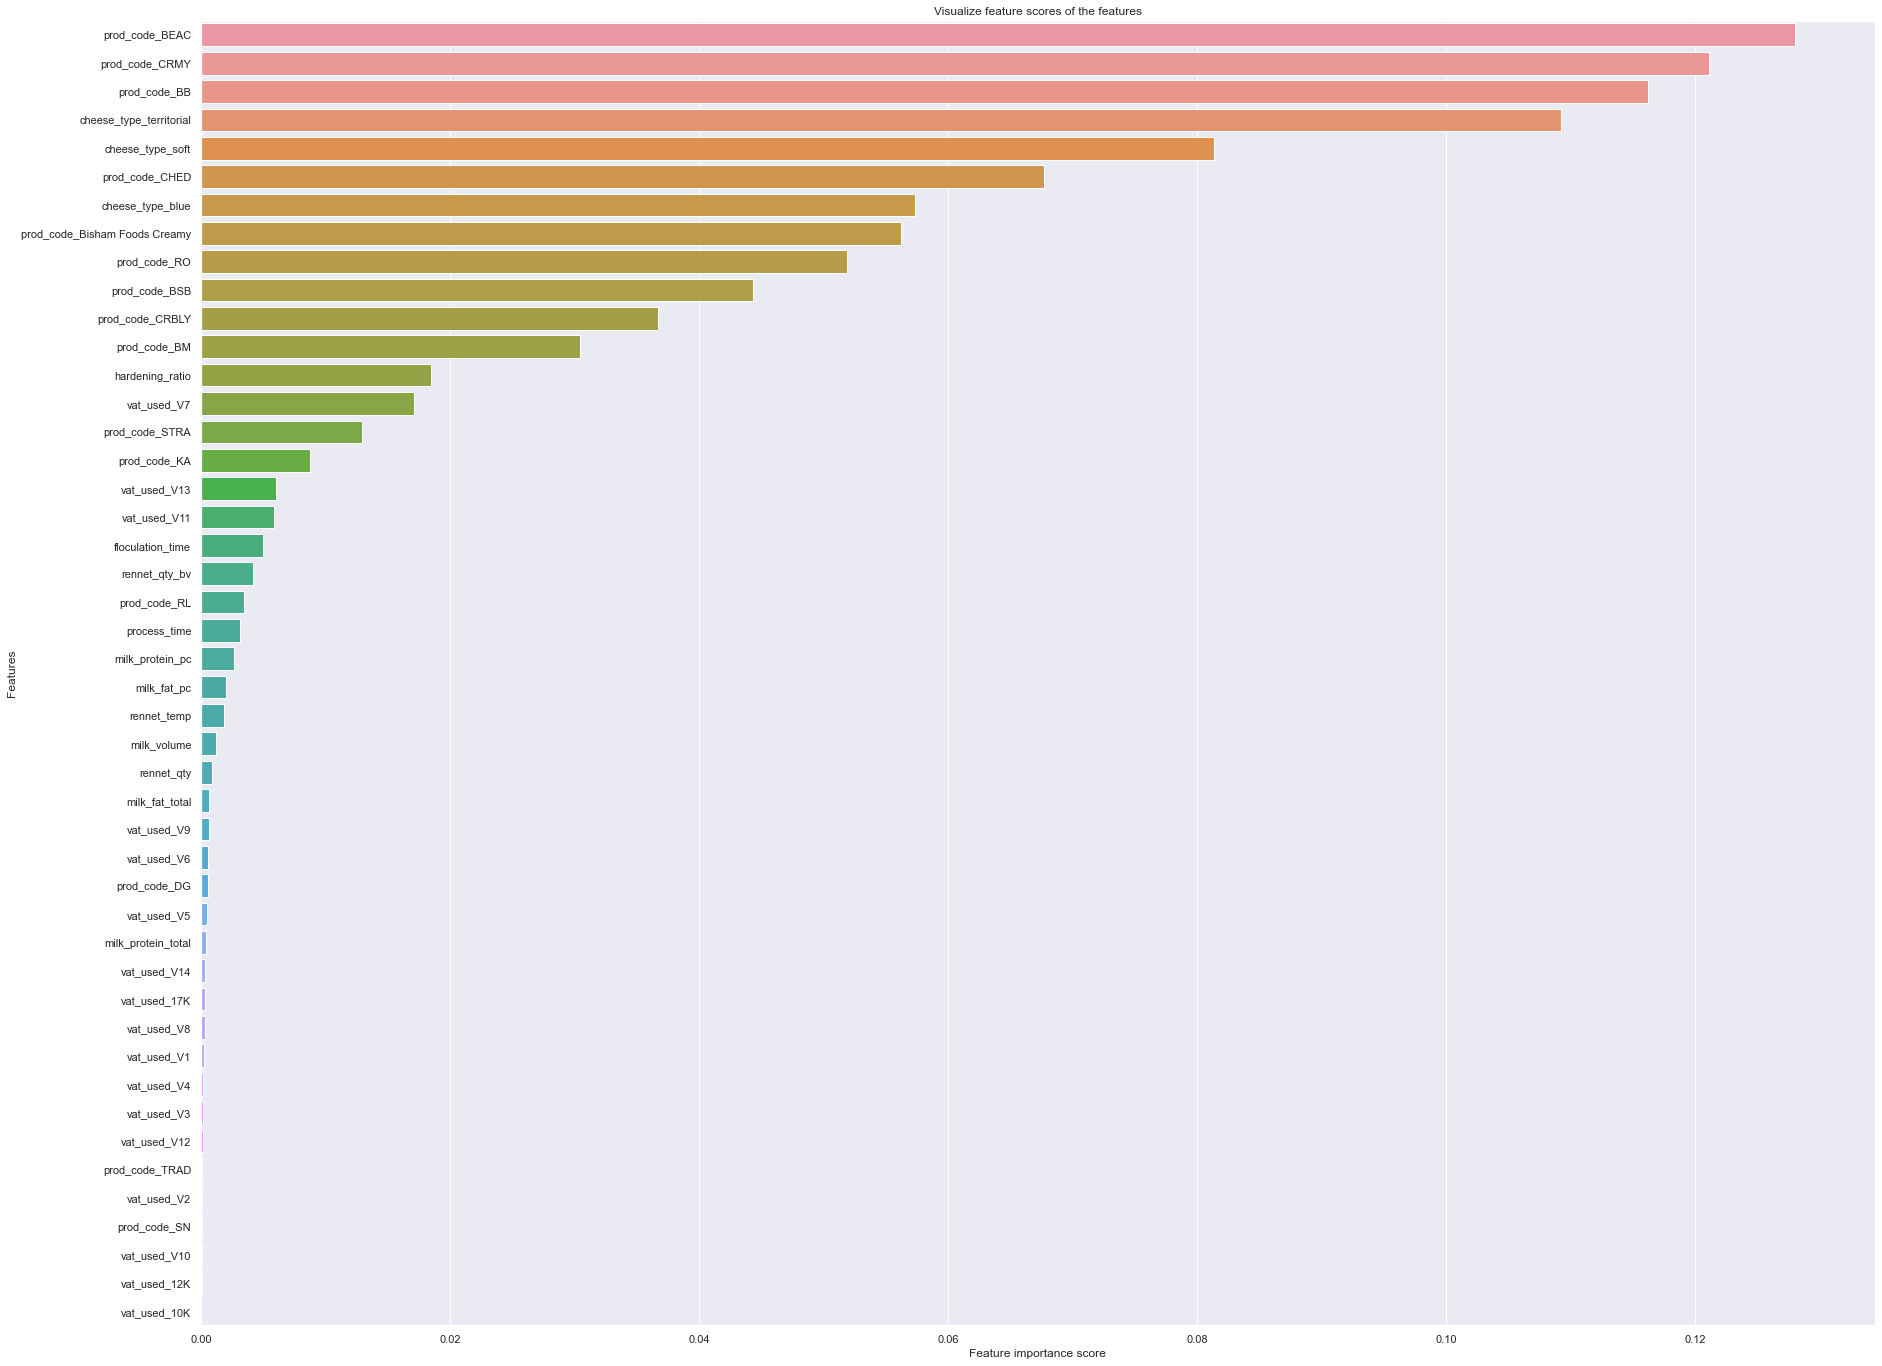

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=X_train)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

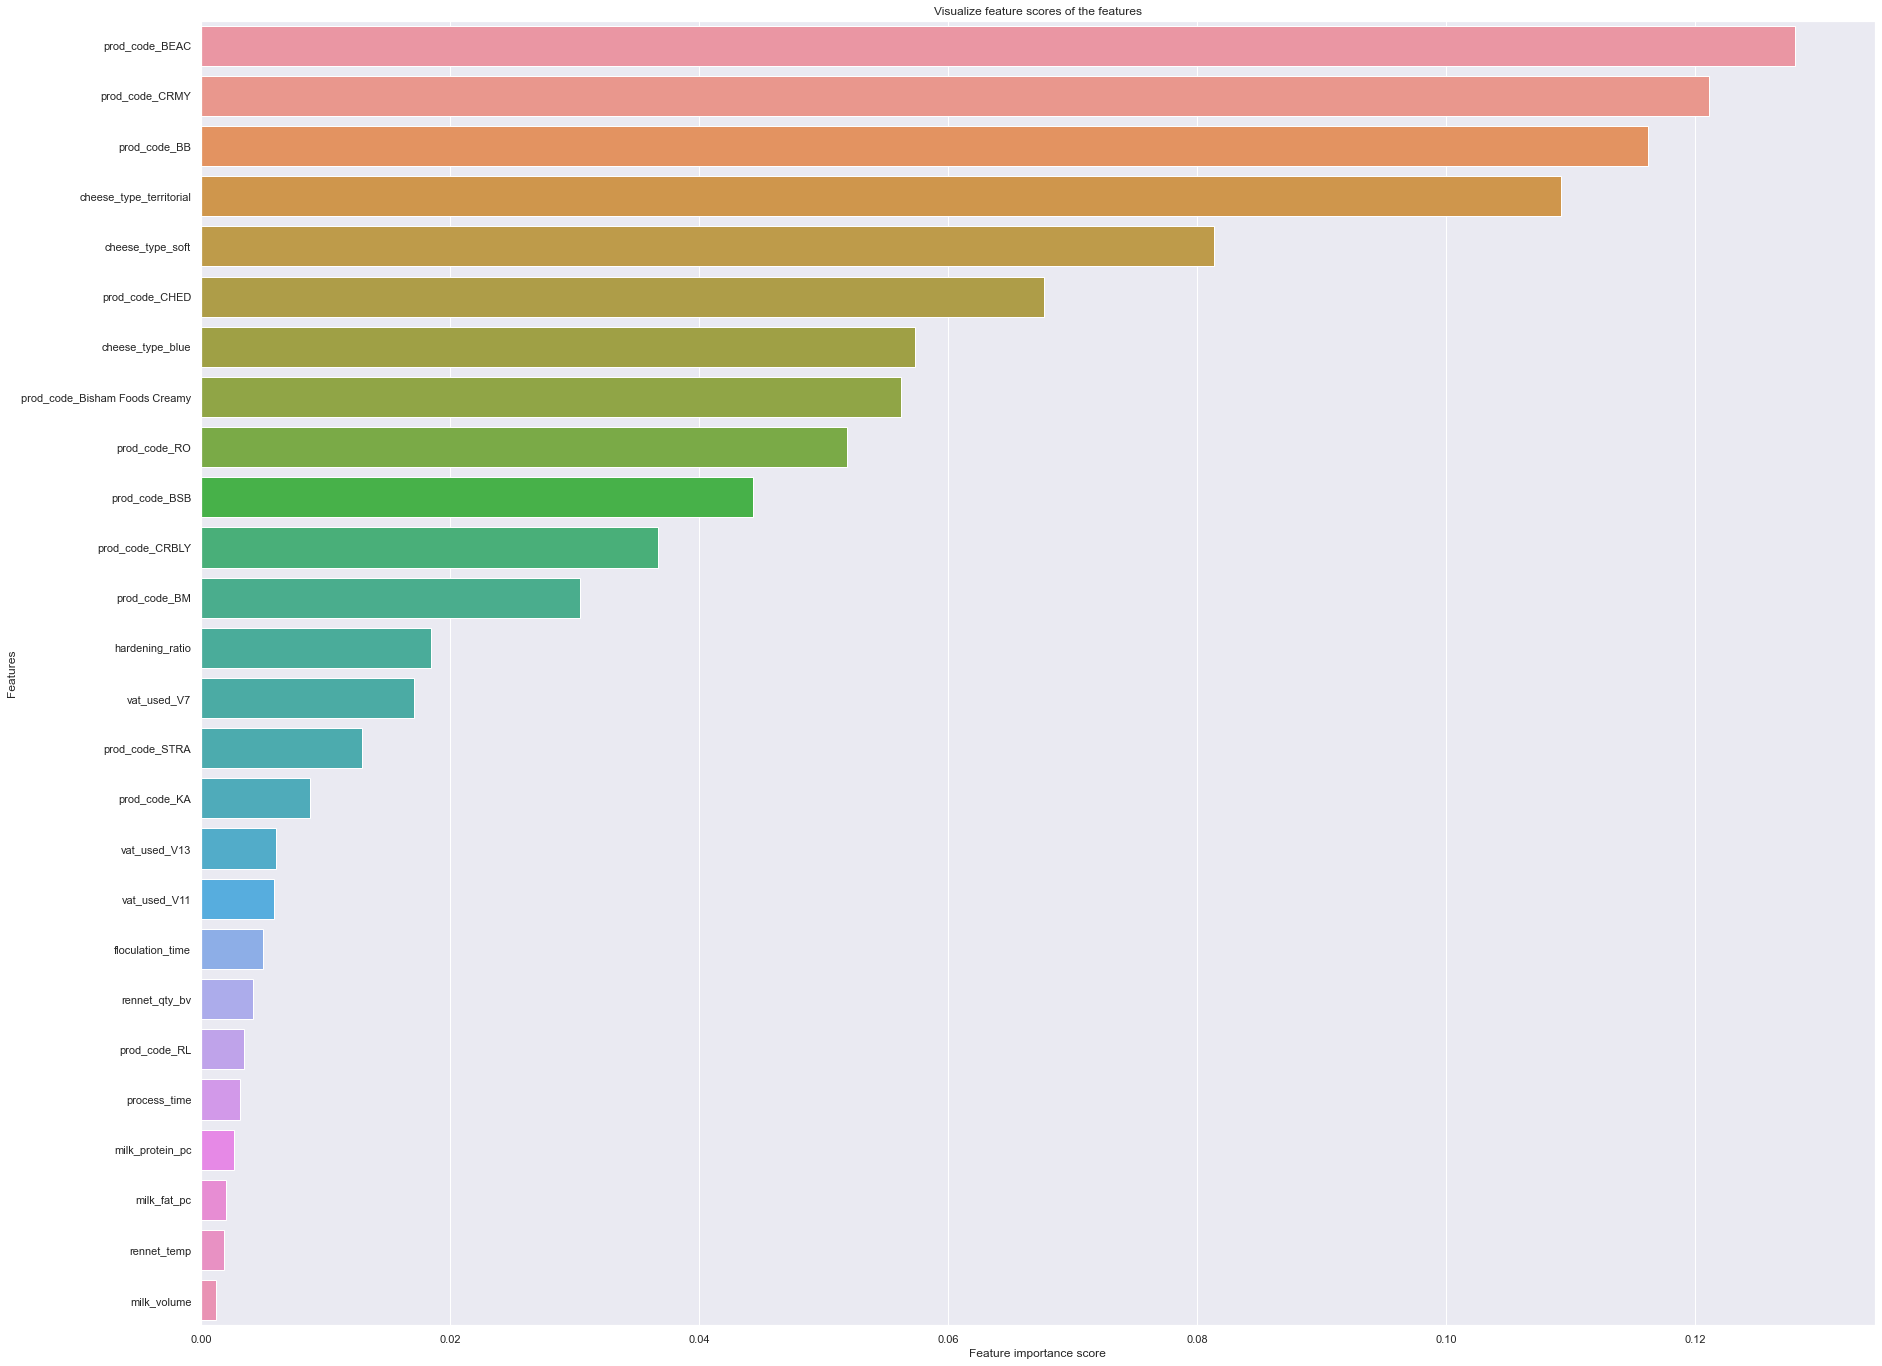

In [ ]:
ignore_last = 20
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:-ignore_last], y=feature_scores.index[:-ignore_last], data=X_train)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:-ignore_last])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

It looks like the most useful features are the cheese types (which makes sense given our exploratory plots!)

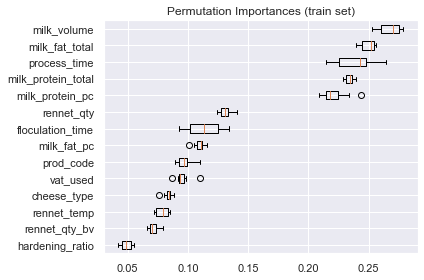

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation importance
result = permutation_importance(
    rf_random, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()